In [1]:
import os
import requests
import time
import sys

In [2]:
import os
import time
import requests
import sys


def retrieve_html():
    for year in range(2013,2021):
        for month in range(1,13):
            if(month<10):
                url='http://en.tutiempo.net/climate/0{}-{}/ws-430030.html'.format(month
                                                                          ,year)
            else:
                url='http://en.tutiempo.net/climate/{}-{}/ws-430030.html'.format(month
                                                                          ,year)
            texts=requests.get(url)
            text_utf=texts.text.encode('utf=8')
            
            if not os.path.exists("Data/Html_Data/{}".format(year)):
                os.makedirs("Data/Html_Data/{}".format(year))
            with open("Data/Html_Data/{}/{}.html".format(year,month),"wb") as output:
                output.write(text_utf)
            
        sys.stdout.flush()
        
if __name__=="__main__":
    start_time=time.time()
    retrieve_html()
    stop_time=time.time()
    print("Time taken {}".format(stop_time-start_time))
        

Time taken 103.79981637001038


In [3]:
import requests
import sys
import pandas as pd
from bs4 import BeautifulSoup
import os
import csv

In [4]:
def met_data(month, year):
    file_html = open('Data/Html_Data/{}/{}.html'.format(year,month), 'rb')
    plain_text = file_html.read()
    tempD = []
    finalD = []
    soup = BeautifulSoup(plain_text, "lxml")
    for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
        for tbody in table:
            for tr in tbody:
                a = tr.get_text()
                tempD.append(a)
    rows = len(tempD) / 15
    for times in range(round(rows)):
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)
    length = len(finalD)
    finalD.pop(length - 1)
    finalD.pop(0)
    for a in range(len(finalD)):
        finalD[a].pop(6)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(9)
        finalD[a].pop(0)
    return finalD

In [5]:
def data_combine(year, cs):
    for a in pd.read_csv('Data/Real-Data/real_' + str(year) + '.csv', chunksize=cs):
        print(year)
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist



In [6]:

if __name__ == "__main__":
    if not os.path.exists("Data/Real-Data"):
        os.makedirs("Data/Real-Data")
    for year in range(2013,2021):
        final_data = []
        with open('Data/Real-Data/real_' + str(year) + '.csv', 'w') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            wr.writerow(
                ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM','Date','Month','Year'])
        for month in range(1,13):
            temp = met_data(month, year)
            for i in range(0,len(temp)):
                temp[i].append(i+1)
                temp[i].append(month)
                temp[i].append(year)
            print(temp)
            final_data = final_data + temp

        with open('Data/Real-Data/real_' + str(year) + '.csv', 'a') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            for row in final_data:
                #print(row)
                flag = 0
                for elem in row:
                    if elem == "" or elem == "-":
                        flag = 1
                    if flag != 1:
                        wr.writerow(row)
                    
    data_2013 = data_combine(2013, 600)
    data_2014 = data_combine(2014, 600)
    data_2015 = data_combine(2015, 600)
    data_2016 = data_combine(2016, 600)
    data_2017 = data_combine(2017, 600)
    data_2018 = data_combine(2018, 600)
    data_2019 = data_combine(2019, 600)
    data_2020 = data_combine(2020, 600)
     
    total=data_2013+data_2014+data_2015+data_2016+data_2017+data_2018+data_2019+data_2020
    
    with open('Data/Real-Data/Real_Combine.csv', 'w') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        wr.writerow(
            ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM','Date','Month','Year'])
        wr.writerows(total)
        
        


[['25.6', '30.3', '20', '-', '71', '2.4', '7.8', '18.3', 1, 1, 2013], ['24.7', '30.6', '18', '-', '54', '2.9', '9.8', '18.3', 2, 1, 2013], ['23.3', '29.3', '15.2', '-', '50', '2.7', '7', '18.3', 3, 1, 2013], ['', '', '', '', '', '', '', '', 4, 1, 2013], ['', '', '', '', '', '', '', '', 5, 1, 2013], ['', '', '', '', '', '', '', '', 6, 1, 2013], ['21.8', '29.5', '11.3', '-', '52', '2.7', '7.2', '18.3', 7, 1, 2013], ['24.3', '32.8', '14.5', '-', '46', '2.4', '7.6', '16.5', 8, 1, 2013], ['25.9', '34', '15.8', '-', '50', '2.4', '6.7', '16.5', 9, 1, 2013], ['', '', '', '', '', '', '', '', 10, 1, 2013], ['', '', '', '', '', '', '', '', 11, 1, 2013], ['', '', '', '', '', '', '', '', 12, 1, 2013], ['25.3', '33.5', '14.4', '-', '43', '2.6', '5.4', '16.5', 13, 1, 2013], ['25.7', '32.6', '15.2', '-', '56', '2.4', '7.6', '18.3', 14, 1, 2013], ['24.7', '31.5', '14', '-', '60', '2.3', '5', '18.3', 15, 1, 2013], ['', '', '', '', '', '', '', '', 16, 1, 2013], ['', '', '', '', '', '', '', '', 17, 1, 201

[['30.9', '34.5', '27.2', '-', '66', '6.1', '14.4', '22.2', 1, 6, 2013], ['30.2', '34.2', '26.6', '-', '70', '5', '13.9', '27.8', 2, 6, 2013], ['28.7', '34.5', '24.8', '-', '74', '3.9', '12.6', '20.6', 3, 6, 2013], ['', '', '', '', '', '', '', '', 4, 6, 2013], ['', '', '', '', '', '', '', '', 5, 6, 2013], ['', '', '', '', '', '', '', '', 6, 6, 2013], ['28.4', '33', '25', '1002.4', '84', '2.4', '11.5', '22.2', 7, 6, 2013], ['28', '32.3', '23', '-', '83', '3.7', '14.3', '22.2', 8, 6, 2013], ['26.7', '28', '25.4', '-', '94', '1.9', '13', '22.2', 9, 6, 2013], ['', '', '', '', '', '', '', '', 10, 6, 2013], ['', '', '', '', '', '', '', '', 11, 6, 2013], ['', '', '', '', '', '', '', '', 12, 6, 2013], ['28.1', '30.5', '25.4', '-', '86', '2.7', '11.9', '24.1', 13, 6, 2013], ['26.8', '30', '24.2', '-', '92', '2.1', '10.6', '22.2', 14, 6, 2013], ['27.1', '29', '22.6', '-', '93', '2.3', '14.8', '24.1', 15, 6, 2013], ['', '', '', '', '', '', '', '', 16, 6, 2013], ['', '', '', '', '', '', '', '', 17

[['29', '34.3', '21.2', '-', '53', '3.1', '9.6', '16.5', 1, 11, 2013], ['29.7', '35.3', '21.8', '-', '53', '3.1', '10.2', '16.5', 2, 11, 2013], ['30.4', '35.4', '22.6', '-', '54', '2.9', '9.8', '16.5', 3, 11, 2013], ['', '', '', '', '', '', '', '', 4, 11, 2013], ['', '', '', '', '', '', '', '', 5, 11, 2013], ['', '', '', '', '', '', '', '', 6, 11, 2013], ['28.8', '34', '21.9', '-', '57', '2.7', '7.6', '13', 7, 11, 2013], ['28.6', '33', '22.2', '-', '60', '2.6', '8', '16.5', 8, 11, 2013], ['28.7', '33.5', '21.8', '-', '60', '2.4', '8.9', '16.5', 9, 11, 2013], ['', '', '', '', '', '', '', '', 10, 11, 2013], ['', '', '', '', '', '', '', '', 11, 11, 2013], ['', '', '', '', '', '', '', '', 12, 11, 2013], ['27.3', '33', '19.8', '-', '63', '2.3', '8.7', '18.3', 13, 11, 2013], ['27.6', '33.6', '20.4', '-', '59', '2.1', '8.3', '18.3', 14, 11, 2013], ['28.2', '33.3', '20.4', '-', '48', '3.1', '12.2', '24.1', 15, 11, 2013], ['', '', '', '', '', '', '', '', 16, 11, 2013], ['', '', '', '', '', '', 

[['29.8', '33.3', '27', '-', '73', '3.5', '10.7', '24.1', 1, 5, 2014], ['29.6', '33.3', '25.8', '-', '72', '4', '10.9', '24.1', 2, 5, 2014], ['29.7', '35.4', '27', '-', '66', '4.2', '10.6', '22.2', 3, 5, 2014], ['', '', '', '', '', '', '', '', 4, 5, 2014], ['', '', '', '', '', '', '', '', 5, 5, 2014], ['', '', '', '', '', '', '', '', 6, 5, 2014], ['31.3', '35', '27.6', '-', '62', '2.9', '9.8', '22.2', 7, 5, 2014], ['31.1', '35.6', '28.7', '-', '69', '3.5', '10.4', '22.2', 8, 5, 2014], ['30.6', '34.6', '28', '-', '70', '4', '10.7', '22.2', 9, 5, 2014], ['', '', '', '', '', '', '', '', 10, 5, 2014], ['', '', '', '', '', '', '', '', 11, 5, 2014], ['', '', '', '', '', '', '', '', 12, 5, 2014], ['29.9', '33.5', '27', '-', '66', '3.9', '12', '22.2', 13, 5, 2014], ['29.9', '33', '27', '-', '65', '4.2', '13.1', '27.8', 14, 5, 2014], ['29.9', '33.8', '27.4', '-', '64', '4.5', '12.6', '24.1', 15, 5, 2014], ['', '', '', '', '', '', '', '', 16, 5, 2014], ['', '', '', '', '', '', '', '', 17, 5, 201

[['28.3', '33', '25', '-', '76', '2.4', '9.8', '24.1', 1, 10, 2014], ['30.5', '35', '25.4', '-', '67', '2.7', '9.1', '18.3', 2, 10, 2014], ['31.1', '35', '26', '-', '69', '2.9', '9.1', '22.2', 3, 10, 2014], ['', '', '', '', '', '', '', '', 4, 10, 2014], ['', '', '', '', '', '', '', '', 5, 10, 2014], ['', '', '', '', '', '', '', '', 6, 10, 2014], ['28.1', '32.8', '24.3', '-', '77', '2.6', '11.1', '35.2', 7, 10, 2014], ['28.8', '32.7', '24.6', '-', '76', '3.7', '9.3', '24.1', 8, 10, 2014], ['29.6', '34', '25.4', '-', '73', '3.2', '9.4', '22.2', 9, 10, 2014], ['', '', '', '', '', '', '', '', 10, 10, 2014], ['', '', '', '', '', '', '', '', 11, 10, 2014], ['', '', '', '', '', '', '', '', 12, 10, 2014], ['30.1', '34', '24.9', '-', '69', '2.9', '9.3', '18.3', 13, 10, 2014], ['29.3', '32.8', '24.2', '-', '78', '2.7', '9.4', '16.5', 14, 10, 2014], ['31.1', '36', '25.6', '-', '68', '2.4', '6.9', '20.6', 15, 10, 2014], ['', '', '', '', '', '', '', '', 16, 10, 2014], ['', '', '', '', '', '', '', '

[['29', '33.6', '19.6', '-', '53', '4', '11.3', '24.1', 1, 4, 2015], ['29.1', '33.3', '20.8', '-', '56', '3.4', '10.9', '24.1', 2, 4, 2015], ['28.1', '32', '22', '-', '68', '3.9', '10.7', '24.1', 3, 4, 2015], ['', '', '', '', '', '', '', '', 4, 4, 2015], ['', '', '', '', '', '', '', '', 5, 4, 2015], ['', '', '', '', '', '', '', '', 6, 4, 2015], ['28.2', '32', '22', '-', '67', '2.9', '9.6', '20.6', 7, 4, 2015], ['28.4', '32', '22.8', '-', '71', '2.9', '11.5', '25.9', 8, 4, 2015], ['28.9', '32', '25.2', '-', '74', '3.2', '9.1', '18.3', 9, 4, 2015], ['', '', '', '', '', '', '', '', 10, 4, 2015], ['', '', '', '', '', '', '', '', 11, 4, 2015], ['', '', '', '', '', '', '', '', 12, 4, 2015], ['28.6', '32.3', '23.6', '1012', '66', '3.2', '8.5', '24.1', 13, 4, 2015], ['27.7', '31.8', '23.2', '-', '68', '3.1', '8.9', '22.2', 14, 4, 2015], ['29.3', '33.2', '21.8', '-', '66', '3.4', '9.4', '29.4', 15, 4, 2015], ['', '', '', '', '', '', '', '', 16, 4, 2015], ['', '', '', '', '', '', '', '', 17, 4, 

[['28.6', '31.8', '24.6', '-', '77', '4', '10.9', '22.2', 1, 9, 2015], ['27.9', '31.3', '23.3', '-', '80', '3.5', '10', '22.2', 2, 9, 2015], ['28.4', '32', '23.8', '-', '74', '4.3', '12', '24.1', 3, 9, 2015], ['', '', '', '', '', '', '', '', 4, 9, 2015], ['', '', '', '', '', '', '', '', 5, 9, 2015], ['', '', '', '', '', '', '', '', 6, 9, 2015], ['28.8', '32.2', '24.4', '-', '69', '4.8', '9.8', '20.6', 7, 9, 2015], ['28.9', '32', '23.8', '-', '71', '4.3', '9.3', '20.6', 8, 9, 2015], ['28.6', '31.5', '24.4', '-', '75', '4.2', '9.8', '18.3', 9, 9, 2015], ['', '', '', '', '', '', '', '', 10, 9, 2015], ['', '', '', '', '', '', '', '', 11, 9, 2015], ['', '', '', '', '', '', '', '', 12, 9, 2015], ['27.9', '31.5', '23.7', '-', '87', '2.7', '6.5', '18.3', 13, 9, 2015], ['28.3', '31.5', '23.8', '-', '84', '3.5', '9.8', '20.6', 14, 9, 2015], ['28.7', '31', '24.2', '-', '80', '3.9', '10.2', '22.2', 15, 9, 2015], ['', '', '', '', '', '', '', '', 16, 9, 2015], ['', '', '', '', '', '', '', '', 17, 9,

[['29.3', '35', '20.2', '-', '59', '2.1', '7.4', '20.6', 1, 3, 2016], ['29.7', '34', '23.2', '-', '61', '2.4', '8.5', '20.6', 2, 3, 2016], ['31.3', '36', '24.9', '-', '46', '2.7', '10.9', '18.3', 3, 3, 2016], ['', '', '', '', '', '', '', '', 4, 3, 2016], ['', '', '', '', '', '', '', '', 5, 3, 2016], ['', '', '', '', '', '', '', '', 6, 3, 2016], ['28.6', '33', '20', '-', '50', '3.1', '9.3', '22.2', 7, 3, 2016], ['29.6', '35', '21.4', '-', '43', '3.4', '11.3', '20.6', 8, 3, 2016], ['29.3', '34', '22.6', '-', '49', '3.2', '11.3', '24.1', 9, 3, 2016], ['', '', '', '', '', '', '', '', 10, 3, 2016], ['', '', '', '', '', '', '', '', 11, 3, 2016], ['', '', '', '', '', '', '', '', 12, 3, 2016], ['26.9', '31', '22.9', '-', '66', '5.5', '10.9', '18.3', 13, 3, 2016], ['26.7', '30', '20.6', '-', '66', '4.3', '10.4', '25.9', 14, 3, 2016], ['28.2', '31', '22.3', '-', '56', '3.9', '10.6', '25.9', 15, 3, 2016], ['', '', '', '', '', '', '', '', 16, 3, 2016], ['', '', '', '', '', '', '', '', 17, 3, 2016]

[['28.2', '31.3', '25.4', '-', '81', '3.7', '15.9', '25.9', 1, 9, 2016], ['27.2', '30.3', '25', '-', '85', '3.4', '11.9', '31.7', 2, 9, 2016], ['27.4', '30.2', '23.6', '-', '82', '3.4', '12.8', '22.2', 3, 9, 2016], ['', '', '', '', '', '', '', '', 4, 9, 2016], ['', '', '', '', '', '', '', '', 5, 9, 2016], ['', '', '', '', '', '', '', '', 6, 9, 2016], ['27.6', '30.6', '25.4', '-', '78', '3.4', '14.3', '27.8', 7, 9, 2016], ['27.9', '31.5', '24', '-', '78', '3.2', '11.9', '22.2', 8, 9, 2016], ['27.2', '31.7', '24', '-', '81', '3.2', '10.9', '22.2', 9, 9, 2016], ['', '', '', '', '', '', '', '', 10, 9, 2016], ['', '', '', '', '', '', '', '', 11, 9, 2016], ['', '', '', '', '', '', '', '', 12, 9, 2016], ['28', '30', '23.6', '-', '81', '3.5', '9.3', '20.6', 13, 9, 2016], ['28.9', '31', '23.9', '-', '78', '3.4', '11.9', '20.6', 14, 9, 2016], ['26.2', '28', '25', '-', '92', '2.1', '9.8', '20.6', 15, 9, 2016], ['', '', '', '', '', '', '', '', 16, 9, 2016], ['', '', '', '', '', '', '', '', 17, 9, 

[['30.6', '37', '18.7', '-', '39', '3.1', '8.3', '18.3', 1, 3, 2017], ['29.2', '35', '19.3', '-', '43', '3.5', '9.3', '22.2', 2, 3, 2017], ['28.1', '33', '20.5', '-', '53', '3.4', '9.1', '20.6', 3, 3, 2017], ['', '', '', '', '', '', '', '', 4, 3, 2017], ['', '', '', '', '', '', '', '', 5, 3, 2017], ['', '', '', '', '', '', '', '', 6, 3, 2017], ['27.1', '31', '18.4', '-', '66', '2.9', '9.3', '20.6', 7, 3, 2017], ['27.6', '31.6', '19.8', '-', '62', '3.5', '9.1', '22.2', 8, 3, 2017], ['27.7', '32', '20.8', '-', '57', '4.3', '11.5', '20.6', 9, 3, 2017], ['', '', '', '', '', '', '', '', 10, 3, 2017], ['', '', '', '', '', '', '', '', 11, 3, 2017], ['', '', '', '', '', '', '', '', 12, 3, 2017], ['27.4', '32.2', '15.2', '-', '31', '3.5', '9.4', '22.2', 13, 3, 2017], ['28.7', '36', '16.2', '-', '39', '3.5', '9.1', '20.6', 14, 3, 2017], ['28.9', '33', '19.4', '-', '47', '3.2', '9.6', '22.2', 15, 3, 2017], ['', '', '', '', '', '', '', '', 16, 3, 2017], ['', '', '', '', '', '', '', '', 17, 3, 2017

[['27.9', '31', '26', '-', '84', '3.2', '11.9', '25.9', 1, 9, 2017], ['27.8', '31', '25', '-', '85', '3.1', '13.3', '24.1', 2, 9, 2017], ['27.6', '30.2', '25', '-', '87', '3.4', '8.9', '16.5', 3, 9, 2017], ['', '', '', '', '', '', '', '', 4, 9, 2017], ['', '', '', '', '', '', '', '', 5, 9, 2017], ['', '', '', '', '', '', '', '', 6, 9, 2017], ['29.4', '32', '25', '-', '77', '3.7', '11.3', '24.1', 7, 9, 2017], ['29.2', '32.4', '27', '-', '81', '2.7', '10', '22.2', 8, 9, 2017], ['29.1', '31', '26.4', '-', '82', '2.6', '9.3', '16.5', 9, 9, 2017], ['', '', '', '', '', '', '', '', 10, 9, 2017], ['', '', '', '', '', '', '', '', 11, 9, 2017], ['', '', '', '', '', '', '', '', 12, 9, 2017], ['28.5', '31', '23.6', '-', '84', '3.1', '7.6', '14.8', 13, 9, 2017], ['29.1', '32.5', '25', '-', '80', '2.7', '7.8', '20.6', 14, 9, 2017], ['28.1', '31.5', '24', '-', '82', '3.2', '7.6', '20.6', 15, 9, 2017], ['', '', '', '', '', '', '', '', 16, 9, 2017], ['', '', '', '', '', '', '', '', 17, 9, 2017], ['', '

[['29.3', '33', '20.2', '-', '53', '1.8', '8', '18.3', 1, 3, 2018], ['29.5', '34', '21.4', '-', '57', '2.3', '5.9', '18.3', 2, 3, 2018], ['29.3', '35', '22', '-', '63', '2.4', '8.9', '16.5', 3, 3, 2018], ['', '', '', '', '', '', '', '', 4, 3, 2018], ['', '', '', '', '', '', '', '', 5, 3, 2018], ['', '', '', '', '', '', '', '', 6, 3, 2018], ['28.2', '32', '24', '-', '63', '3.5', '11.3', '22.2', 7, 3, 2018], ['27.9', '31', '20', '-', '57', '3.5', '10.2', '25.9', 8, 3, 2018], ['28.9', '35', '19', '-', '44', '4', '11.7', '22.2', 9, 3, 2018], ['', '', '', '', '', '', '', '', 10, 3, 2018], ['', '', '', '', '', '', '', '', 11, 3, 2018], ['', '', '', '', '', '', '', '', 12, 3, 2018], ['31.4', '36', '22.2', '-', '25', '4', '11.7', '22.2', 13, 3, 2018], ['31.4', '37', '23.5', '-', '26', '4.3', '13.3', '24.1', 14, 3, 2018], ['28.2', '30', '24.8', '-', '55', '2.9', '7', '14.8', 15, 3, 2018], ['', '', '', '', '', '', '', '', 16, 3, 2018], ['', '', '', '', '', '', '', '', 17, 3, 2018], ['', '', '', 

[['28.4', '31.4', '27', '-', '82', '2.6', '20.2', '31.7', 1, 8, 2018], ['28.4', '31', '27', '-', '81', '3.1', '18.1', '25.9', 2, 8, 2018], ['28.2', '30.6', '26.5', '-', '83', '2.9', '18.3', '25.9', 3, 8, 2018], ['', '', '', '', '', '', '', '', 4, 8, 2018], ['', '', '', '', '', '', '', '', 5, 8, 2018], ['', '', '', '', '', '', '', '', 6, 8, 2018], ['28.3', '30', '26.6', '-', '81', '3.2', '18.9', '31.7', 7, 8, 2018], ['28.4', '30', '26.8', '-', '81', '3.1', '18.9', '27.8', 8, 8, 2018], ['27.7', '29', '26.5', '-', '84', '3.1', '19.3', '29.4', 9, 8, 2018], ['', '', '', '', '', '', '', '', 10, 8, 2018], ['', '', '', '', '', '', '', '', 11, 8, 2018], ['', '', '', '', '', '', '', '', 12, 8, 2018], ['27.4', '29', '23.2', '-', '86', '2.9', '20.2', '29.4', 13, 8, 2018], ['28.2', '30', '24.6', '-', '83', '3.1', '21.7', '31.7', 14, 8, 2018], ['27.6', '29', '22.2', '-', '85', '2.6', '20', '25.9', 15, 8, 2018], ['', '', '', '', '', '', '', '', 16, 8, 2018], ['', '', '', '', '', '', '', '', 17, 8, 20

[['24.8', '32', '14.8', '-', '39', '2.4', '7.6', '18.3', 1, 1, 2019], ['25.5', '31', '14.6', '-', '44', '2.3', '6.5', '16.5', 2, 1, 2019], ['25.4', '32', '14.7', '-', '44', '2.7', '5.2', '16.5', 3, 1, 2019], ['', '', '', '', '', '', '', '', 4, 1, 2019], ['', '', '', '', '', '', '', '', 5, 1, 2019], ['', '', '', '', '', '', '', '', 6, 1, 2019], ['25.7', '32.9', '14.2', '-', '37', '3.1', '8.5', '18.3', 7, 1, 2019], ['25.2', '32', '16.3', '-', '37', '2.7', '7.6', '20.6', 8, 1, 2019], ['24.2', '30', '13.8', '-', '49', '2.6', '5.6', '16.5', 9, 1, 2019], ['', '', '', '', '', '', '', '', 10, 1, 2019], ['', '', '', '', '', '', '', '', 11, 1, 2019], ['', '', '', '', '', '', '', '', 12, 1, 2019], ['24.2', '29.6', '14', '-', '54', '2.3', '7.6', '18.3', 13, 1, 2019], ['26.2', '33', '15.1', '-', '46', '2.4', '6.9', '16.5', 14, 1, 2019], ['27.6', '32', '19.6', '-', '42', '2.7', '9.1', '18.3', 15, 1, 2019], ['', '', '', '', '', '', '', '', 16, 1, 2019], ['', '', '', '', '', '', '', '', 17, 1, 2019], 

[['26.3', '28', '24', '-', '95', '1.6', '11.7', '22.2', 1, 7, 2019], ['26.6', '29', '23.4', '-', '94', '2.4', '6.5', '18.3', 2, 7, 2019], ['27.4', '30', '24', '-', '90', '2.7', '8.1', '18.3', 3, 7, 2019], ['', '', '', '', '', '', '', '', 4, 7, 2019], ['', '', '', '', '', '', '', '', 5, 7, 2019], ['', '', '', '', '', '', '', '', 6, 7, 2019], ['29.2', '30.2', '25', '-', '86', '2.4', '20.6', '31.7', 7, 7, 2019], ['28.2', '30', '25.1', '-', '89', '2.1', '18', '29.4', 8, 7, 2019], ['28.9', '31.8', '26', '-', '86', '2.4', '17.6', '27.8', 9, 7, 2019], ['', '', '', '', '', '', '', '', 10, 7, 2019], ['', '', '', '', '', '', '', '', 11, 7, 2019], ['', '', '', '', '', '', '', '', 12, 7, 2019], ['28.6', '30.4', '25.4', '-', '87', '2.7', '17', '27.8', 13, 7, 2019], ['29.4', '31', '25.4', '-', '82', '3.2', '17', '25.9', 14, 7, 2019], ['29.6', '31', '27', '-', '82', '3.2', '17.6', '27.8', 15, 7, 2019], ['', '', '', '', '', '', '', '', 16, 7, 2019], ['', '', '', '', '', '', '', '', 17, 7, 2019], ['', 

[['29.4', '34', '23.6', '-', '65', '2.4', '8', '16.5', 1, 12, 2019], ['29.2', '34', '23.4', '-', '64', '2.7', '9.8', '18.3', 2, 12, 2019], ['29.4', '33', '23.7', '-', '59', '3.7', '10.6', '16.5', 3, 12, 2019], ['', '', '', '', '', '', '', '', 4, 12, 2019], ['', '', '', '', '', '', '', '', 5, 12, 2019], ['', '', '', '', '', '', '', '', 6, 12, 2019], ['28.3', '33', '21.6', '-', '48', '3.7', '10.9', '20.6', 7, 12, 2019], ['28.1', '32', '22.2', '-', '55', '2.7', '8.9', '16.5', 8, 12, 2019], ['28.4', '32', '21.6', '-', '60', '3.5', '8.1', '14.8', 9, 12, 2019], ['', '', '', '', '', '', '', '', 10, 12, 2019], ['', '', '', '', '', '', '', '', 11, 12, 2019], ['', '', '', '', '', '', '', '', 12, 12, 2019], ['25.9', '30', '19.5', '-', '64', '3.1', '11.5', '22.2', 13, 12, 2019], ['25.6', '30.4', '18', '-', '62', '3.1', '8.9', '22.2', 14, 12, 2019], ['26.2', '31', '18', '-', '65', '2.7', '7.8', '20.6', 15, 12, 2019], ['', '', '', '', '', '', '', '', 16, 12, 2019], ['', '', '', '', '', '', '', '', 1

[['30.7', '33.6', '27.8', '-', '72', '4.5', '12.4', '24.1', 1, 5, 2020], ['30.6', '33.8', '26.3', '-', '74', '4.3', '12.2', '25.9', 2, 5, 2020], ['30.8', '34', '27', '-', '72', '4.3', '12.6', '27.8', 3, 5, 2020], ['', '', '', '', '', '', '', '', 4, 5, 2020], ['', '', '', '', '', '', '', '', 5, 5, 2020], ['', '', '', '', '', '', '', '', 6, 5, 2020], ['30.6', '33.8', '25.6', '-', '73', '5.1', '11.5', '22.2', 7, 5, 2020], ['30.6', '33.8', '25.7', '-', '71', '4.7', '11.7', '22.2', 8, 5, 2020], ['30.7', '34', '26.1', '-', '71', '4.3', '10.6', '25.9', 9, 5, 2020], ['', '', '', '', '', '', '', '', 10, 5, 2020], ['', '', '', '', '', '', '', '', 11, 5, 2020], ['', '', '', '', '', '', '', '', 12, 5, 2020], ['30.8', '33.8', '26.8', '-', '74', '4.3', '12.6', '27.8', 13, 5, 2020], ['31.4', '34', '27', '-', '72', '4.7', '11.7', '25.9', 14, 5, 2020], ['31.7', '34', '28.2', '-', '68', '4.8', '14.1', '27.8', 15, 5, 2020], ['', '', '', '', '', '', '', '', 16, 5, 2020], ['', '', '', '', '', '', '', '', 1

[['29.3', '32.2', '24.6', '-', '74', '4.2', '9.3', '24.1', 1, 10, 2020], ['29.3', '32', '25.4', '-', '82', '3.7', '8.9', '24.1', 2, 10, 2020], ['28.3', '32', '24', '-', '85', '2.6', '10.4', '22.2', 3, 10, 2020], ['', '', '', '', '', '', '', '', 4, 10, 2020], ['', '', '', '', '', '', '', '', 5, 10, 2020], ['', '', '', '', '', '', '', '', 6, 10, 2020], ['30.3', '33.2', '25.8', '-', '76', '3.1', '7.6', '22.2', 7, 10, 2020], ['30.3', '33', '26.6', '-', '79', '2.9', '5.6', '18.3', 8, 10, 2020], ['31.4', '35', '27', '-', '67', '2.9', '8.5', '18.3', 9, 10, 2020], ['', '', '', '', '', '', '', '', 10, 10, 2020], ['', '', '', '', '', '', '', '', 11, 10, 2020], ['', '', '', '', '', '', '', '', 12, 10, 2020], ['29.3', '33', '26.4', '-', '87', '2.3', '7.4', '18.3', 13, 10, 2020], ['28.3', '33', '25', '-', '89', '2.3', '8.1', '16.5', 14, 10, 2020], ['28.1', '31', '24.5', '-', '91', '2.6', '9.8', '22.2', 15, 10, 2020], ['', '', '', '', '', '', '', '', 16, 10, 2020], ['', '', '', '', '', '', '', '', 1

In [7]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [10]:
df[:10]

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year
0,24.4,28.3,20.0,-,58,2.4,9.3,20.6,31,12,2013
1,25.4,30.5,19.2,-,59,2.1,8.7,16.5,1,1,2014
2,25.4,30.5,19.2,-,59,2.1,8.7,16.5,1,1,2014
3,25.4,30.5,19.2,-,59,2.1,8.7,16.5,1,1,2014
4,26.7,33.0,21.7,-,55,2.3,8.3,20.6,2,1,2014
5,26.7,33.0,21.7,-,55,2.3,8.3,20.6,2,1,2014
6,26.7,33.0,21.7,-,55,2.3,8.3,20.6,2,1,2014
7,26.7,33.4,20.2,-,57,2.1,9.6,20.6,3,1,2014
8,26.7,33.4,20.2,-,57,2.1,9.6,20.6,3,1,2014
9,26.7,33.4,20.2,-,57,2.1,9.6,20.6,3,1,2014


In [ ]:
date=[]
for i in range(len(df['Date'])):
    date.append(str(df['Date'][i])+'-'+str(df['Month'][i])+'-'+str(df['Year'][i]))
date
    

In [ ]:
df['date']=date

In [ ]:
df['date'] =  pd.to_datetime(df['date'])

In [ ]:
df

In [ ]:
aqi=pd.read_csv('E:\\Data21\\aqi\\mumbai.csv')

In [ ]:
aqi['date'] =  pd.to_datetime(aqi['date'])

In [ ]:
merged_left = pd.merge(left=df, right=aqi, how='left', left_on='date', right_on='date')

In [ ]:
merged_left

In [ ]:
merged_left=merged_left.dropna()

In [ ]:
merged_left.drop_duplicates(subset ="date", 
                     keep ='first', inplace = True)

In [ ]:
merged_left

In [1]:
merged_left.to_csv('Data_Mumbai.csv', sep=',', index=False,header=True) 

In [ ]:
# aqi['Date'] = pd.DatetimeIndex(aqi['date']).day
# aqi['Month'] = pd.DatetimeIndex(aqi['date']).month
# aqi['Year'] = pd.DatetimeIndex(aqi['date']).year

In [ ]:
#len(aqi['date'].unique())

In [ ]:
#aqi=aqi.drop('date',axis=1)

START FROM HERE

In [3]:
import pandas as pd

In [4]:

final=pd.read_csv('Data_Mumbai.csv')


In [6]:
final


,T,TM,Tm,H,VV,V,Date,Month,Year,date,pm25
0,26.2,31.3,23.0,77,1.9,8.7,13,12,2014,2014-12-13,147.0
1,24.4,30.0,19.0,42,2.4,9.4,14,12,2014,2014-12-14,139.0
2,24.1,31.4,14.0,34,2.6,9.3,15,12,2014,2014-12-15,164.0
3,26.7,32.4,19.9,35,2.6,10.4,19,12,2014,2014-12-19,158.0
4,25.8,32.8,21.0,47,2.3,8.1,20,12,2014,2014-12-20,158.0
...,...,...,...,...,...,...,...,...,...,...,...
1001,26.3,32.6,18.0,42,3.4,8.3,21,12,2020,2020-12-21,147.0
1002,27.7,34.2,18.8,50,2.9,7.8,25,12,2020,2020-12-25,173.0
1003,27.8,34.0,19.4,54,2.6,7.2,26,12,2020,2020-12-26,171.0
1004,26.7,31.0,20.2,59,2.6,8.3,27,12,2020,2020-12-27,176.0


Text(0.5, 1.0, 'Mumbai')

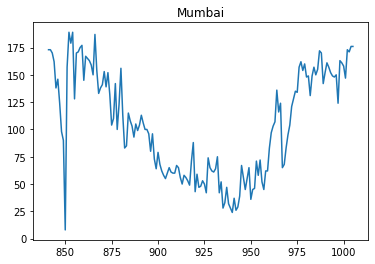

In [7]:
import matplotlib.pyplot as plt
plt.plot(final[' pm25'][final['Year']>2019])
plt.rcParams["figure.figsize"] = (15,10)
plt.title('Mumbai')

In [8]:
#final=final.astype(int)

In [9]:
final.describe()

,T,TM,Tm,H,VV,V,Date,Month,Year,pm25
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,28.414612,32.360835,22.630417,66.375746,3.253579,11.246223,14.619284,6.308151,2017.455268,115.262425
std,2.013925,2.410028,3.651248,16.229694,0.783932,3.723346,8.984630,3.462733,1.758982,53.584608
min,20.900000,24.000000,11.000000,25.000000,1.400000,4.300000,1.000000,1.000000,2014.000000,8.000000
25%,27.200000,31.000000,20.000000,53.000000,2.700000,8.500000,7.000000,3.000000,2016.000000,65.000000
50%,28.500000,32.400000,23.600000,69.000000,3.200000,10.400000,14.000000,6.000000,2017.000000,113.000000
75%,29.900000,34.000000,25.200000,80.000000,3.900000,13.000000,21.000000,9.000000,2019.000000,160.000000
max,33.300000,42.000000,29.600000,97.000000,5.500000,25.700000,31.000000,12.000000,2020.000000,327.000000


In [10]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1006 non-null   float64
 1   TM      1006 non-null   float64
 2   Tm      1006 non-null   float64
 3   H       1006 non-null   int64  
 4   VV      1006 non-null   float64
 5   V       1006 non-null   float64
 6   Date    1006 non-null   int64  
 7   Month   1006 non-null   int64  
 8   Year    1006 non-null   int64  
 9   date    1006 non-null   object 
 10   pm25   1006 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 86.6+ KB


In [11]:
final

,T,TM,Tm,H,VV,V,Date,Month,Year,date,pm25
0,26.2,31.3,23.0,77,1.9,8.7,13,12,2014,2014-12-13,147.0
1,24.4,30.0,19.0,42,2.4,9.4,14,12,2014,2014-12-14,139.0
2,24.1,31.4,14.0,34,2.6,9.3,15,12,2014,2014-12-15,164.0
3,26.7,32.4,19.9,35,2.6,10.4,19,12,2014,2014-12-19,158.0
4,25.8,32.8,21.0,47,2.3,8.1,20,12,2014,2014-12-20,158.0
...,...,...,...,...,...,...,...,...,...,...,...
1001,26.3,32.6,18.0,42,3.4,8.3,21,12,2020,2020-12-21,147.0
1002,27.7,34.2,18.8,50,2.9,7.8,25,12,2020,2020-12-25,173.0
1003,27.8,34.0,19.4,54,2.6,7.2,26,12,2020,2020-12-26,171.0
1004,26.7,31.0,20.2,59,2.6,8.3,27,12,2020,2020-12-27,176.0


In [12]:
final=final.drop(['T'],axis=1)

In [13]:
final

,TM,Tm,H,VV,V,Date,Month,Year,date,pm25
0,31.3,23.0,77,1.9,8.7,13,12,2014,2014-12-13,147.0
1,30.0,19.0,42,2.4,9.4,14,12,2014,2014-12-14,139.0
2,31.4,14.0,34,2.6,9.3,15,12,2014,2014-12-15,164.0
3,32.4,19.9,35,2.6,10.4,19,12,2014,2014-12-19,158.0
4,32.8,21.0,47,2.3,8.1,20,12,2014,2014-12-20,158.0
...,...,...,...,...,...,...,...,...,...,...
1001,32.6,18.0,42,3.4,8.3,21,12,2020,2020-12-21,147.0
1002,34.2,18.8,50,2.9,7.8,25,12,2020,2020-12-25,173.0
1003,34.0,19.4,54,2.6,7.2,26,12,2020,2020-12-26,171.0
1004,31.0,20.2,59,2.6,8.3,27,12,2020,2020-12-27,176.0


In [14]:
final['weekday']=pd.DatetimeIndex(final['date']).weekday

In [15]:
final

,TM,Tm,H,VV,V,Date,Month,Year,date,pm25,weekday
0,31.3,23.0,77,1.9,8.7,13,12,2014,2014-12-13,147.0,5
1,30.0,19.0,42,2.4,9.4,14,12,2014,2014-12-14,139.0,6
2,31.4,14.0,34,2.6,9.3,15,12,2014,2014-12-15,164.0,0
3,32.4,19.9,35,2.6,10.4,19,12,2014,2014-12-19,158.0,4
4,32.8,21.0,47,2.3,8.1,20,12,2014,2014-12-20,158.0,5
...,...,...,...,...,...,...,...,...,...,...,...
1001,32.6,18.0,42,3.4,8.3,21,12,2020,2020-12-21,147.0,0
1002,34.2,18.8,50,2.9,7.8,25,12,2020,2020-12-25,173.0,4
1003,34.0,19.4,54,2.6,7.2,26,12,2020,2020-12-26,171.0,5
1004,31.0,20.2,59,2.6,8.3,27,12,2020,2020-12-27,176.0,6


In [16]:
final.columns

Index(['TM', 'Tm', 'H', 'VV', 'V', 'Date', 'Month', 'Year', 'date', ' pm25',
       'weekday'],
      dtype='object')

In [17]:
concern=[]
category=[]
for i in range(len(final[' pm25'])):
    x=final[' pm25'][i]
    if x<=50:
        concern.append('Good')
        category.append(0)
    elif x<=100:
        concern.append('Moderate')
        category.append(1)
    elif x<=150:
        concern.append('Unhealthy for Sensitive Groups')
        category.append(2)

    elif x<=200:
        concern.append('Unhealthy')
        category.append(3)
    elif x<=300:
        concern.append('Very Unhealthy')
        category.append(4)
    else:
        concern.append('Hazardous')
        category.append(5)

        


        

In [18]:
final['concern']=concern
final['level']=category

In [19]:
final

,TM,Tm,H,VV,V,Date,Month,Year,date,pm25,weekday,concern,level
0,31.3,23.0,77,1.9,8.7,13,12,2014,2014-12-13,147.0,5,Unhealthy for Sensitive Groups,2
1,30.0,19.0,42,2.4,9.4,14,12,2014,2014-12-14,139.0,6,Unhealthy for Sensitive Groups,2
2,31.4,14.0,34,2.6,9.3,15,12,2014,2014-12-15,164.0,0,Unhealthy,3
3,32.4,19.9,35,2.6,10.4,19,12,2014,2014-12-19,158.0,4,Unhealthy,3
4,32.8,21.0,47,2.3,8.1,20,12,2014,2014-12-20,158.0,5,Unhealthy,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,32.6,18.0,42,3.4,8.3,21,12,2020,2020-12-21,147.0,0,Unhealthy for Sensitive Groups,2
1002,34.2,18.8,50,2.9,7.8,25,12,2020,2020-12-25,173.0,4,Unhealthy,3
1003,34.0,19.4,54,2.6,7.2,26,12,2020,2020-12-26,171.0,5,Unhealthy,3
1004,31.0,20.2,59,2.6,8.3,27,12,2020,2020-12-27,176.0,6,Unhealthy,3


In [20]:
final.describe()

,TM,Tm,H,VV,V,Date,Month,Year,pm25,weekday,level
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,32.360835,22.630417,66.375746,3.253579,11.246223,14.619284,6.308151,2017.455268,115.262425,2.987078,1.819085
std,2.410028,3.651248,16.229694,0.783932,3.723346,8.984630,3.462733,1.758982,53.584608,1.979203,1.113049
min,24.000000,11.000000,25.000000,1.400000,4.300000,1.000000,1.000000,2014.000000,8.000000,0.000000,0.000000
25%,31.000000,20.000000,53.000000,2.700000,8.500000,7.000000,3.000000,2016.000000,65.000000,1.000000,1.000000
50%,32.400000,23.600000,69.000000,3.200000,10.400000,14.000000,6.000000,2017.000000,113.000000,3.000000,2.000000
75%,34.000000,25.200000,80.000000,3.900000,13.000000,21.000000,9.000000,2019.000000,160.000000,5.000000,3.000000
max,42.000000,29.600000,97.000000,5.500000,25.700000,31.000000,12.000000,2020.000000,327.000000,6.000000,5.000000


In [21]:
weekend=[]
for i in range(len(final[' pm25'])):
    x=final['weekday'][i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    


In [22]:
final['weekend']=weekend

In [23]:
final

,TM,Tm,H,VV,V,Date,Month,Year,date,pm25,weekday,concern,level,weekend
0,31.3,23.0,77,1.9,8.7,13,12,2014,2014-12-13,147.0,5,Unhealthy for Sensitive Groups,2,1
1,30.0,19.0,42,2.4,9.4,14,12,2014,2014-12-14,139.0,6,Unhealthy for Sensitive Groups,2,1
2,31.4,14.0,34,2.6,9.3,15,12,2014,2014-12-15,164.0,0,Unhealthy,3,0
3,32.4,19.9,35,2.6,10.4,19,12,2014,2014-12-19,158.0,4,Unhealthy,3,0
4,32.8,21.0,47,2.3,8.1,20,12,2014,2014-12-20,158.0,5,Unhealthy,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,32.6,18.0,42,3.4,8.3,21,12,2020,2020-12-21,147.0,0,Unhealthy for Sensitive Groups,2,0
1002,34.2,18.8,50,2.9,7.8,25,12,2020,2020-12-25,173.0,4,Unhealthy,3,0
1003,34.0,19.4,54,2.6,7.2,26,12,2020,2020-12-26,171.0,5,Unhealthy,3,1
1004,31.0,20.2,59,2.6,8.3,27,12,2020,2020-12-27,176.0,6,Unhealthy,3,1


In [24]:
final=final.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)

In [25]:
final=final.astype(int)

In [26]:
final

,TM,Tm,H,VV,V,Month,level,weekend
0,31,23,77,1,8,12,2,1
1,30,19,42,2,9,12,2,1
2,31,14,34,2,9,12,3,0
3,32,19,35,2,10,12,3,0
4,32,21,47,2,8,12,3,1
...,...,...,...,...,...,...,...,...
1001,32,18,42,3,8,12,2,0
1002,34,18,50,2,7,12,3,0
1003,34,19,54,2,7,12,3,1
1004,31,20,59,2,8,12,3,1


In [27]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   TM       1006 non-null   int32
 1   Tm       1006 non-null   int32
 2   H        1006 non-null   int32
 3   VV       1006 non-null   int32
 4   V        1006 non-null   int32
 5   Month    1006 non-null   int32
 6   level    1006 non-null   int32
 7   weekend  1006 non-null   int32
dtypes: int32(8)
memory usage: 31.6 KB


In [28]:
final.describe()

,TM,Tm,H,VV,V,Month,level,weekend
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,32.171968,22.262425,66.375746,2.781312,10.781312,6.308151,1.819085,0.277336
std,2.407131,3.672775,16.229694,0.861497,3.747489,3.462733,1.113049,0.447906
min,24.000000,11.000000,25.000000,1.000000,4.000000,1.000000,0.000000,0.000000
25%,31.000000,20.000000,53.000000,2.000000,8.000000,3.000000,1.000000,0.000000
50%,32.000000,23.000000,69.000000,3.000000,10.000000,6.000000,2.000000,0.000000
75%,34.000000,25.000000,80.000000,3.000000,13.000000,9.000000,3.000000,1.000000
max,42.000000,29.000000,97.000000,5.000000,25.000000,12.000000,5.000000,1.000000


In [29]:
final=final.astype({"Month":'category', "level":'category', "weekend":'category'})

In [30]:
final

,TM,Tm,H,VV,V,Month,level,weekend
0,31,23,77,1,8,12,2,1
1,30,19,42,2,9,12,2,1
2,31,14,34,2,9,12,3,0
3,32,19,35,2,10,12,3,0
4,32,21,47,2,8,12,3,1
...,...,...,...,...,...,...,...,...
1001,32,18,42,3,8,12,2,0
1002,34,18,50,2,7,12,3,0
1003,34,19,54,2,7,12,3,1
1004,31,20,59,2,8,12,3,1


In [31]:
final=final[['TM','Tm','H','VV','V','Month','weekend','level']]

###### 

In [32]:
final

,TM,Tm,H,VV,V,Month,weekend,level
0,31,23,77,1,8,12,1,2
1,30,19,42,2,9,12,1,2
2,31,14,34,2,9,12,0,3
3,32,19,35,2,10,12,0,3
4,32,21,47,2,8,12,1,3
...,...,...,...,...,...,...,...,...
1001,32,18,42,3,8,12,0,2
1002,34,18,50,2,7,12,0,3
1003,34,19,54,2,7,12,1,3
1004,31,20,59,2,8,12,1,3


In [33]:
import seaborn as sns

start 2

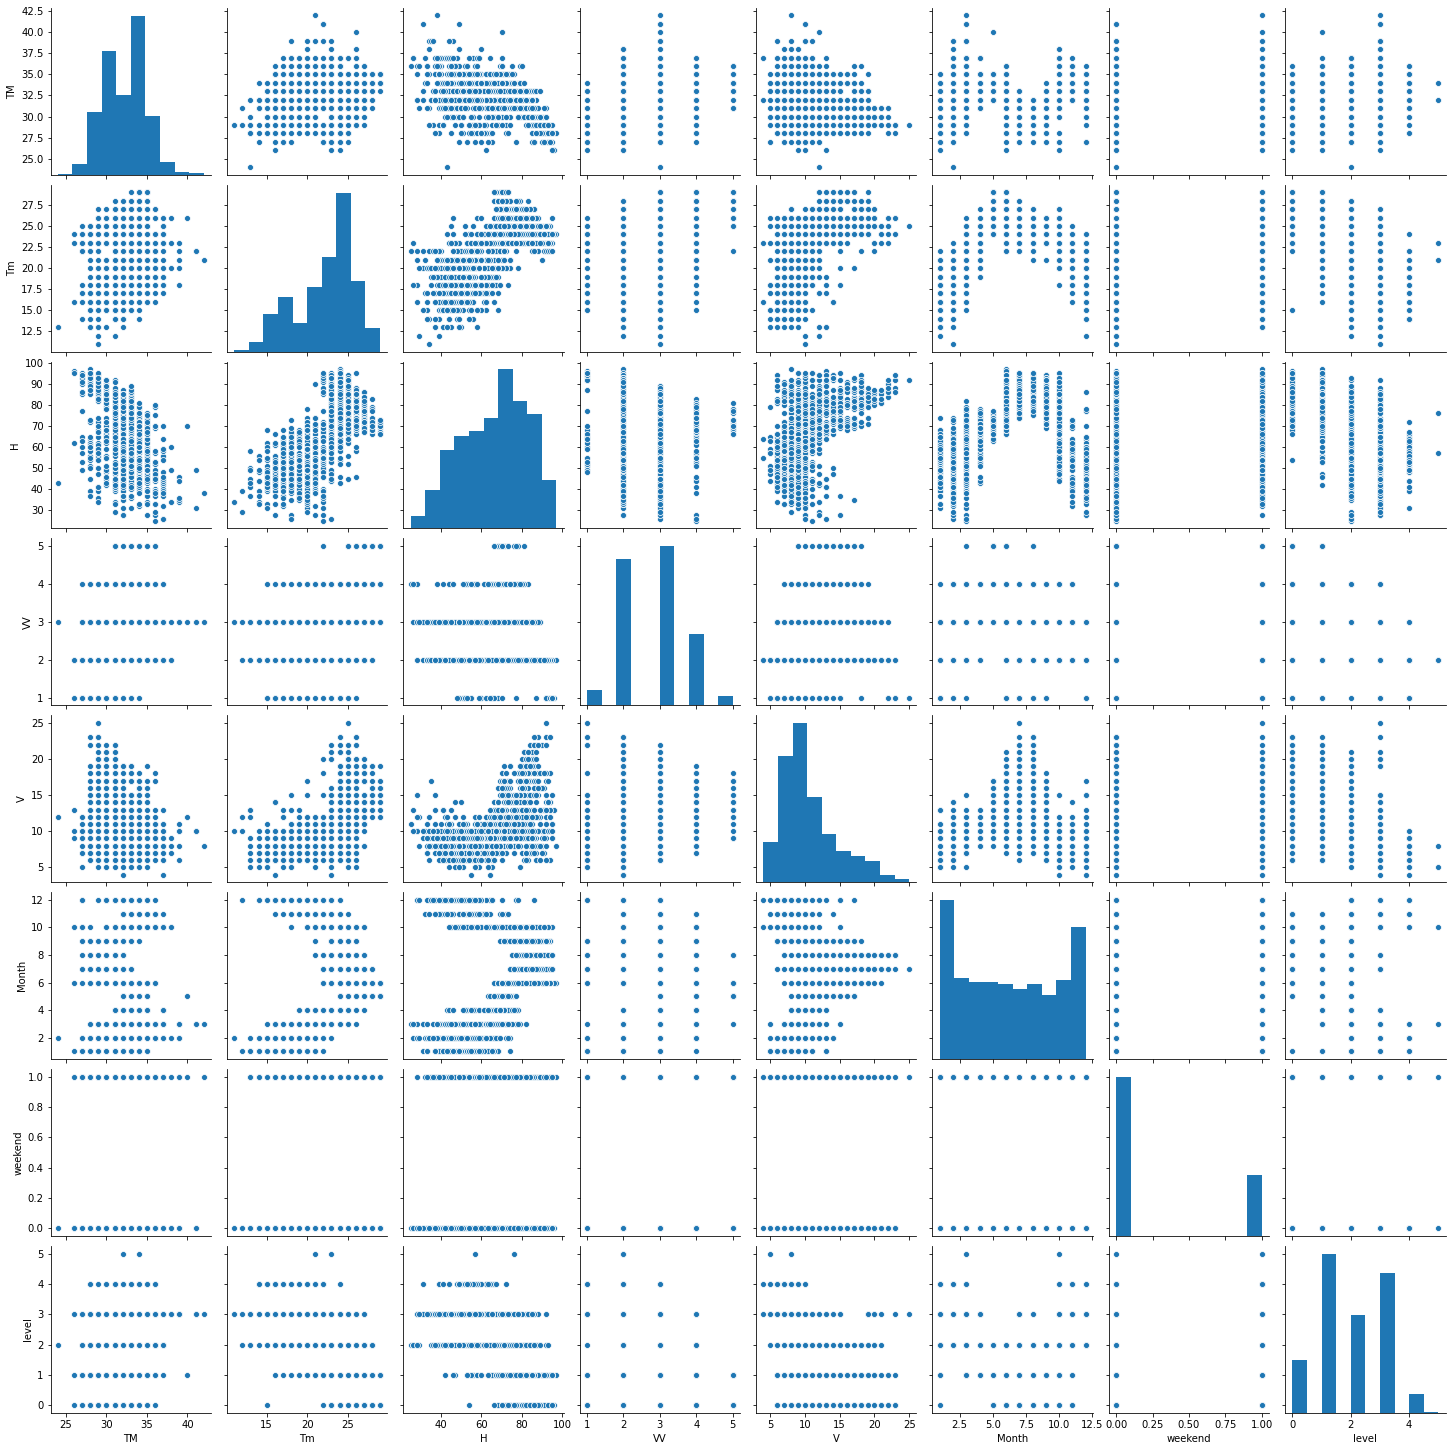

In [34]:
sns.pairplot(final)

In [35]:
final.corr()

,TM,Tm,H,VV,V
TM,1.000000,0.129498,-0.460874,0.298369,-0.225261
Tm,0.129498,1.000000,0.690044,0.332316,0.548255
H,-0.460874,0.690044,1.000000,-0.019594,0.511048
VV,0.298369,0.332316,-0.019594,1.000000,0.147904
V,-0.225261,0.548255,0.511048,0.147904,1.000000


In [36]:
X=final.iloc[:,:6]

In [37]:
X

,TM,Tm,H,VV,V,Month
0,31,23,77,1,8,12
1,30,19,42,2,9,12
2,31,14,34,2,9,12
3,32,19,35,2,10,12
4,32,21,47,2,8,12
...,...,...,...,...,...,...
1001,32,18,42,3,8,12
1002,34,18,50,2,7,12
1003,34,19,54,2,7,12
1004,31,20,59,2,8,12


In [38]:
y=final.iloc[:,6:]

In [39]:
y

,weekend,level
0,1,2
1,1,2
2,0,3
3,0,3
4,1,3
...,...,...
1001,0,2
1002,0,3
1003,1,3
1004,1,3


In [40]:
final1=pd.read_csv('Data_Chennai.csv')

In [41]:
final1

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25
0,26.2,31.3,23.0,-,77,1.9,8.7,18.3,13,12,2014,2014-12-13,131.0
1,24.4,30.0,19.0,-,42,2.4,9.4,20.6,14,12,2014,2014-12-14,124.0
2,24.1,31.4,14.0,-,34,2.6,9.3,22.2,15,12,2014,2014-12-15,116.0
3,26.7,32.4,19.9,-,35,2.6,10.4,20.6,19,12,2014,2014-12-19,132.0
4,25.8,32.8,21.0,-,47,2.3,8.1,16.5,20,12,2014,2014-12-20,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,26.3,32.6,18.0,-,42,3.4,8.3,18.3,21,12,2020,2020-12-21,143.0
1011,27.7,34.2,18.8,-,50,2.9,7.8,14.8,25,12,2020,2020-12-25,149.0
1012,27.8,34.0,19.4,-,54,2.6,7.2,16.5,26,12,2020,2020-12-26,154.0
1013,26.7,31.0,20.2,-,59,2.6,8.3,18.3,27,12,2020,2020-12-27,167.0


In [42]:
final1=final1.drop(['SLP','VM'],axis=1)
final1=final1.drop(['T'],axis=1)
final1['weekday']=pd.DatetimeIndex(final1['date']).weekday
concern=[]
category=[]
for i in range(len(final1[' pm25'])):
    x=final1[' pm25'][i]
    if x<=50:
        concern.append('Good')
        category.append(0)
    elif x<=100:
        concern.append('Moderate')
        category.append(1)
    elif x<=150:
        concern.append('Unhealthy for Sensitive Groups')
        category.append(2)

    elif x<=200:
        concern.append('Unhealthy')
        category.append(3)
    elif x<=300:
        concern.append('Very Unhealthy')
        category.append(4)
    else:
        concern.append('Hazardous')
        category.append(5)
final1['concern']=concern
final1['level']=category
weekend=[]
for i in range(len(final1[' pm25'])):
    x=final1['weekday'][i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final1['weekend']=weekend
final1=final1.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final1=final1.astype(int)

final1=final1.astype({"Month":'category', "level":'category', "weekend":'category'})
final1=final1[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [43]:
final1

,TM,Tm,H,VV,V,Month,weekend,level
0,31,23,77,1,8,12,1,2
1,30,19,42,2,9,12,1,2
2,31,14,34,2,9,12,0,2
3,32,19,35,2,10,12,0,2
4,32,21,47,2,8,12,1,2
...,...,...,...,...,...,...,...,...
1010,32,18,42,3,8,12,0,2
1011,34,18,50,2,7,12,0,2
1012,34,19,54,2,7,12,1,3
1013,31,20,59,2,8,12,1,3


In [44]:
final2=pd.read_csv('Data_Kolkata.csv')


In [45]:
final2

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25
0,26.2,31.3,23.0,-,77,1.9,8.7,18.3,13,12,2014,2014-12-13,215.0
1,24.4,30.0,19.0,-,42,2.4,9.4,20.6,14,12,2014,2014-12-14,220.0
2,24.1,31.4,14.0,-,34,2.6,9.3,22.2,15,12,2014,2014-12-15,232.0
3,26.7,32.4,19.9,-,35,2.6,10.4,20.6,19,12,2014,2014-12-19,198.0
4,25.8,32.8,21.0,-,47,2.3,8.1,16.5,20,12,2014,2014-12-20,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,26.3,32.6,18.0,-,42,3.4,8.3,18.3,21,12,2020,2020-12-21,288.0
1042,27.7,34.2,18.8,-,50,2.9,7.8,14.8,25,12,2020,2020-12-25,253.0
1043,27.8,34.0,19.4,-,54,2.6,7.2,16.5,26,12,2020,2020-12-26,252.0
1044,26.7,31.0,20.2,-,59,2.6,8.3,18.3,27,12,2020,2020-12-27,245.0


In [46]:
final2=final2.drop(['SLP','VM'],axis=1)
final2=final2.drop(['T'],axis=1)
final2['weekday']=pd.DatetimeIndex(final2['date']).weekday
concern=[]
category=[]
for i in range(len(final2[' pm25'])):
    x=final2[' pm25'][i]
    if x<=50:
        concern.append('Good')
        category.append(0)
    elif x<=100:
        concern.append('Moderate')
        category.append(1)
    elif x<=150:
        concern.append('Unhealthy for Sensitive Groups')
        category.append(2)

    elif x<=200:
        concern.append('Unhealthy')
        category.append(3)
    elif x<=300:
        concern.append('Very Unhealthy')
        category.append(4)
    else:
        concern.append('Hazardous')
        category.append(5)
final2['concern']=concern
final2['level']=category
weekend=[]
for i in range(len(final2[' pm25'])):
    x=final2['weekday'][i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final2['weekend']=weekend
final2=final2.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final2=final2.astype(int)

final2=final2.astype({"Month":'category', "level":'category', "weekend":'category'})
final2=final2[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [47]:
final2

,TM,Tm,H,VV,V,Month,weekend,level
0,31,23,77,1,8,12,1,4
1,30,19,42,2,9,12,1,4
2,31,14,34,2,9,12,0,4
3,32,19,35,2,10,12,0,3
4,32,21,47,2,8,12,1,3
...,...,...,...,...,...,...,...,...
1041,32,18,42,3,8,12,0,4
1042,34,18,50,2,7,12,0,4
1043,34,19,54,2,7,12,1,4
1044,31,20,59,2,8,12,1,4


In [48]:
final3=pd.read_csv('Data_Delhi.csv')

In [49]:
final3

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,pm10,o3,no2,so2,co
0,31.0,33.6,28.0,-,71,3.7,18.0,24.1,1,7,2014,2014-01-07,,,4,31,2,18
1,26.8,29.0,24.0,-,91,2.1,9.4,18.3,2,7,2014,2014-02-07,136,,,,,
2,26.2,28.0,25.0,-,94,1.9,8.3,16.5,3,7,2014,2014-03-07,,,12,21,,20
3,27.2,31.0,24.8,1006.7,90,2.7,9.6,20.6,7,7,2014,2014-07-07,133,,11,17,2,7
4,28.5,31.1,25.4,-,88,2.6,10.6,18.3,8,7,2014,2014-08-07,181,,12,15,,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,29.6,33.0,24.9,-,63,4.3,11.5,22.2,2,5,2019,2019-02-05,164,,,36,10,15
550,29.3,32.8,24.2,-,66,4.8,13.3,29.4,3,5,2019,2019-03-05,139,,,37,7,16
551,29.8,32.8,25.0,-,69,4.2,12.8,24.1,7,5,2019,2019-07-05,185,,,65,9,27
552,29.8,33.0,27.4,-,67,4.3,13.1,29.4,8,5,2019,2019-08-05,178,,,41,12,20


In [50]:
final3.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'Date', 'Month', 'Year',
       'date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'],
      dtype='object')

In [51]:
final3=final3.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final3=final3.drop(['T'],axis=1)
final3['weekday']=pd.DatetimeIndex(final3['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final3[' pm25'])):
    x=final3[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final3['concern']=concern
final3['level']=category
final3=final3.drop(drop)

weekend=[]
for i in range(len(final3[' pm25'])):
    x=final3['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final3['weekend']=weekend
final3=final3.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final3=final3.astype(int)

final3=final3.astype({"Month":'category', "level":'category', "weekend":'category'})
final3=final3[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [52]:
final3

,TM,Tm,H,VV,V,Month,weekend,level
1,29,24,91,2,9,7,0,2
3,31,24,90,2,9,7,0,2
4,31,25,88,2,10,7,0,3
5,28,26,93,2,8,7,1,3
8,31,27,84,2,19,7,0,4
...,...,...,...,...,...,...,...,...
549,33,24,63,4,11,5,0,3
550,32,24,66,4,13,5,0,2
551,32,25,69,4,12,5,0,3
552,33,27,67,4,13,5,0,3


In [53]:
final4=pd.read_csv('Data_Lucknow.csv')

In [54]:
final4

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,pm10,o3,no2,so2,co
0,26.7,33.4,20.2,-,57,2.1,9.6,20.6,3,1,2014,2014-03-01,,,,11,2,16
1,27.7,33.9,21.6,-,39,2.6,7.2,18.3,2,2,2014,2014-02-02,,,,11,2,16
2,27.4,34.3,20.0,-,43,2.6,7.8,22.2,3,2,2014,2014-03-02,,75,,,,
3,28.0,33.0,24.0,-,69,4.5,11.9,22.2,2,4,2014,2014-02-04,,,,11,2,
4,28.8,33.6,24.6,-,65,3.9,10.2,20.6,3,4,2014,2014-03-04,,42,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,26.3,32.6,18.0,-,42,3.4,8.3,18.3,21,12,2020,2020-12-21,357,384,15,12,,9
1094,27.7,34.2,18.8,-,50,2.9,7.8,14.8,25,12,2020,2020-12-25,257,327,18,26,5,9
1095,27.8,34.0,19.4,-,54,2.6,7.2,16.5,26,12,2020,2020-12-26,269,529,17,29,2,15
1096,26.7,31.0,20.2,-,59,2.6,8.3,18.3,27,12,2020,2020-12-27,407,397,13,30,3,16


In [55]:
final4=final4.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final4=final4.drop(['T'],axis=1)
final4['weekday']=pd.DatetimeIndex(final4['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final4[' pm25'])):
    x=final4[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final4['concern']=concern
final4['level']=category
final4=final4.drop(drop)

weekend=[]
for i in range(len(final4[' pm25'])):
    x=final4['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final4['weekend']=weekend
final4=final4.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final4=final4.astype(int)

final4=final4.astype({"Month":'category', "level":'category', "weekend":'category'})
final4=final4[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [56]:
final4

,TM,Tm,H,VV,V,Month,weekend,level
107,33,26,70,5,9,5,0,0
108,35,26,68,4,10,5,0,0
109,35,25,74,4,10,5,0,1
110,34,27,72,4,13,5,0,1
111,34,28,72,5,14,5,0,2
...,...,...,...,...,...,...,...,...
1093,32,18,42,3,8,12,0,5
1094,34,18,50,2,7,12,0,4
1095,34,19,54,2,7,12,1,4
1096,31,20,59,2,8,12,1,5


In [57]:
#Amritsar

In [58]:
import pandas as pd

In [59]:
final5=pd.read_csv('Data_Amritsar.csv')

In [60]:
final5

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,pm10,o3,no2,so2,co
0,13.4,20.7,5.4,-,74,1.1,2.4,11.1,26,12,2017,2017-12-26,204,196,10,13,1,12
1,12.6,20.7,7.3,-,94,0.6,0.4,5.4,27,12,2017,2017-12-27,248,114,12,11,3,11
2,15.6,25.1,7.6,-,71,2.7,3.5,18.3,1,12,2018,2018-01-12,142,66,8,16,,
3,15.6,25.3,8.2,-,66,2.6,1.7,7.6,2,12,2018,2018-02-12,115,86,17,14,,
4,15.3,25.1,7.1,-,70,1.9,1.3,7.6,3,12,2018,2018-03-12,136,93,9,12,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,11.9,20.4,4.8,-,73,2.3,1.3,11.1,21,12,2020,2020-12-21,153,127,11,18,2,3
58,7.2,17.0,2.4,1018.2,93,0.3,0.0,-,25,12,2020,2020-12-25,150,94,4,15,1,1
59,8.1,17.0,4.2,-,95,0.2,0.7,7.6,26,12,2020,2020-12-26,141,66,4,13,,1
60,7.8,11.2,4.8,-,96,0.5,8.0,20.6,27,12,2020,2020-12-27,105,65,6,12,,4


In [61]:
final5=final5.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final5=final5.drop(['T'],axis=1)
final5['weekday']=pd.DatetimeIndex(final5['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final5[' pm25'])):
    x=final5[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final5['concern']=concern
final5['level']=category
final5=final5.drop(drop)

weekend=[]
for i in range(len(final5[' pm25'])):
    x=final5['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final5['weekend']=weekend
final5=final5.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final5=final5.astype(int)

final5=final5.astype({"Month":'category', "level":'category', "weekend":'category'})
final5=final5[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [62]:
final5

,TM,Tm,H,VV,V,Month,weekend,level
0,20,5,74,1,2,12,0,4
1,20,7,94,0,0,12,0,4
2,25,7,71,2,3,12,0,2
3,25,8,66,2,1,12,0,2
4,25,7,70,1,1,12,0,2
5,22,6,77,1,0,12,0,2
6,22,5,75,1,1,12,1,3
7,22,4,77,1,1,12,0,3
9,21,5,67,3,2,12,1,2
10,21,3,73,2,1,12,0,3


In [63]:
#Benguluru

In [64]:
final6=pd.read_csv('Data_Bengeluru.csv')

In [65]:
final6

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm10,no2,so2,co
0,20.8,28.3,12.9,-,45,6.3,1.1,5.4,2,1,2016,2016-02-01,,60,9,15
1,21.4,29.0,13.7,-,45,6.3,0.4,3.5,3,1,2016,2016-03-01,79,45,10,13
2,21.0,28.7,17.0,-,65,6.3,3.1,5.4,7,1,2016,2016-07-01,57,25,15,5
3,20.4,27.6,16.2,-,61,5.5,1.3,5.4,8,1,2016,2016-08-01,52,36,17,6
4,20.7,28.4,15.1,-,47,6.3,0.9,3.5,9,1,2016,2016-09-01,54,33,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,19.7,25.7,14.5,-,66,6.9,0.9,3.5,21,12,2020,2020-12-21,50,17,3,28
734,21.2,28.2,17.4,-,65,6.9,1.1,5.4,25,12,2020,2020-12-25,30,18,2,6
735,21.2,29.0,16.0,-,61,6.9,2.8,5.4,26,12,2020,2020-12-26,34,13,2,
736,21.4,28.4,15.2,-,61,6.9,1.5,5.4,27,12,2020,2020-12-27,,,3,


In [66]:
final6=final6.drop(['SLP','VM',' no2', ' so2', ' co'],axis=1)
final6=final6.drop(['T'],axis=1)
final6['weekday']=pd.DatetimeIndex(final6['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final6[' pm10'])):
    x=final6[' pm10'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final6['concern']=concern
final6['level']=category
final6=final6.drop(drop)

weekend=[]
for i in range(len(final6[' pm10'])):
    x=final6['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final6['weekend']=weekend
final6=final6.drop(['Date','Year','date',' pm10','weekday','concern'],axis=1)
final6=final6.astype(int)

final6=final6.astype({"Month":'category', "level":'category', "weekend":'category'})
final6=final6[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [67]:
final6

,TM,Tm,H,VV,V,Month,weekend,level
1,29,13,45,6,0,1,0,1
2,28,17,65,6,3,1,0,1
3,27,16,61,5,1,1,0,1
4,28,15,47,6,0,1,0,1
5,28,17,73,4,3,1,0,0
...,...,...,...,...,...,...,...,...
731,28,17,73,6,3,12,1,1
733,25,14,66,6,0,12,0,0
734,28,17,65,6,1,12,0,0
735,29,16,61,6,2,12,1,0


In [68]:
#bhopal

In [69]:
final7=pd.read_csv('Data_Bhopal.csv')

In [70]:
final7

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,pm10,o3,no2,so2,co
0,18.4,25.2,11.8,1015.2,57.0,3.2,7.4,11.1,1.0,12.0,2018.0,2018-01-12,173,94,63,17,3,4
1,19.6,26.4,13.0,1013.8,51.0,3.7,6.7,11.1,2.0,12.0,2018.0,2018-02-12,159,111,55,17,6,5
2,19.6,26.2,14.5,1014.9,55.0,3.1,7.0,11.1,3.0,12.0,2018.0,2018-03-12,167,114,64,16,7,6
3,19.6,25.4,13.4,1013.8,50.0,4.2,8.7,13.0,7.0,12.0,2018.0,2018-07-12,161,83,63,12,3,4
4,20.5,26.0,13.0,1014.1,47.0,4.3,8.5,18.3,8.0,12.0,2018.0,2018-08-12,144,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,16.7,25.0,7.1,1016.8,48.0,4.7,7.2,13,21.0,12.0,2020.0,2020-12-21,79,64,42,14,4,3
130,17.8,25.0,10.4,-,54.0,4.3,9.6,16.5,25.0,12.0,2020.0,2020-12-25,144,82,64,14,5,4
131,18.1,26.0,8.9,1016.2,54.0,4.3,7.2,11.1,26.0,12.0,2020.0,2020-12-26,151,79,73,9,4,4
132,18.2,27.4,10.8,1012.6,62.0,4.0,8.7,18.3,27.0,12.0,2020.0,2020-12-27,151,146,37,10,4,2


In [71]:
final7=final7.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final7=final7.drop(['T'],axis=1)
final7['weekday']=pd.DatetimeIndex(final7['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final7[' pm25'])):
    x=final7[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final7['concern']=concern
final7['level']=category
final7=final7.drop(drop)

weekend=[]
for i in range(len(final7[' pm25'])):
    x=final7['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final7['weekend']=weekend
final7=final7.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final7=final7.astype(int)

final7=final7.astype({"Month":'category', "level":'category', "weekend":'category'})
final7=final7[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [72]:
final7

,TM,Tm,H,VV,V,Month,weekend,level
0,25,11,57,3,7,12,0,3
1,26,13,51,3,6,12,0,3
2,26,14,55,3,7,12,0,3
3,25,13,50,4,8,12,0,3
4,26,13,47,4,8,12,1,2
...,...,...,...,...,...,...,...,...
129,25,7,48,4,7,12,0,1
130,25,10,54,4,9,12,0,2
131,26,8,54,4,7,12,1,3
132,27,10,62,4,8,12,1,3


In [73]:
#gandinagar

In [74]:
final8=pd.read_csv('Data_Gandhinagar.csv')

In [75]:
final8

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,pm10,o3,no2,so2,co
0,32.2,37.0,27.1,-,61,4.0,15.0,25.9,14,6,2019,2019-06-14,,54,12,2,1,2
1,30.3,34.6,27.0,-,74,3.4,9.8,22.2,15,6,2019,2019-06-15,88,58,,2,1,1
2,31.1,36.0,25.3,-,68,3.7,9.8,18.3,19,6,2019,2019-06-19,96,61,,2,,1
3,32.4,37.0,27.7,-,61,3.9,8.9,16.5,20,6,2019,2019-06-20,91,70,,2,1,1
4,33.2,39.0,28.0,-,58,3.9,9.1,14.8,21,6,2019,2019-06-21,100,67,,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,19.1,28.6,12.0,-,47,4.5,6.5,14.8,21,12,2020,2020-12-21,88,69,15,12,9,8
284,22.0,30.0,16.4,-,46,4.5,10.9,18.3,25,12,2020,2020-12-25,113,73,15,12,11,8
285,21.4,29.0,14.0,-,56,3.9,5.7,11.1,26,12,2020,2020-12-26,128,87,15,9,6,8
286,18.7,28.0,10.0,-,45,4.2,4.8,18.3,27,12,2020,2020-12-27,95,98,15,11,8,8


In [76]:
final8=final8.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final8=final8.drop(['T'],axis=1)
final8['weekday']=pd.DatetimeIndex(final8['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final8[' pm25'])):
    x=final8[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final8['concern']=concern
final8['level']=category
final8=final8.drop(drop)

weekend=[]
for i in range(len(final8[' pm25'])):
    x=final8['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final8['weekend']=weekend
final8=final8.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final8=final8.astype(int)

final8=final8.astype({"Month":'category', "level":'category', "weekend":'category'})
final8=final8[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [77]:
final8

,TM,Tm,H,VV,V,Month,weekend,level
1,34,27,74,3,9,6,1,1
2,36,25,68,3,9,6,0,1
3,37,27,61,3,8,6,0,1
4,39,28,58,3,9,6,0,1
5,35,24,71,3,8,6,0,2
...,...,...,...,...,...,...,...,...
283,28,12,47,4,6,12,0,1
284,30,16,46,4,10,12,0,2
285,29,14,56,3,5,12,1,2
286,28,10,45,4,4,12,1,1


In [78]:
#Guwahati

In [79]:
final9=pd.read_csv('Data_Guwahati.csv')

In [80]:
final9

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,pm10,o3,no2,so2,co
0,29.1,31.0,25.7,-,92.0,3.5,5.6,13.0,14.0,6.0,2019.0,2019-06-14,,37,2,3,5,4
1,30.5,34.0,26.9,-,85.0,3.2,2.2,13.0,15.0,6.0,2019.0,2019-06-15,76,37,2,4,5,4
2,32.7,36.4,27.2,-,78.0,3.7,5.6,16.5,19.0,6.0,2019.0,2019-06-19,131,59,1,7,5,6
3,31.1,35.0,28.2,-,84.0,3.2,3.3,16.5,20.0,6.0,2019.0,2019-06-20,106,49,,6,5,6
4,28.5,32.6,25.7,-,94.0,3.4,3.7,29.4,21.0,6.0,2019.0,2019-06-21,95,43,,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,15.6,24.6,9.0,-,74.0,2.6,3.0,11.1,21.0,12.0,2020.0,2020-12-21,190,247,9,7,11,14
123,15.8,24.2,10.0,-,75.0,2.6,0.7,7.6,25.0,12.0,2020.0,2020-12-25,228,164,9,5,10,15
124,16.3,25.2,10.0,-,72.0,2.7,1.9,13.0,26.0,12.0,2020.0,2020-12-26,209,234,7,6,11,16
125,16.3,24.0,11.0,-,75.0,2.3,1.7,9.4,27.0,12.0,2020.0,2020-12-27,218,226,7,5,11,18


In [81]:
final9=final9.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final9=final9.drop(['T'],axis=1)
final9['weekday']=pd.DatetimeIndex(final9['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final9[' pm25'])):
    x=final9[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final9['concern']=concern
final9['level']=category
final9=final9.drop(drop)

weekend=[]
for i in range(len(final9[' pm25'])):
    x=final9['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final9['weekend']=weekend
final9=final9.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final9=final9.astype(int)

final9=final9.astype({"Month":'category', "level":'category', "weekend":'category'})
final9=final9[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [82]:
final9

,TM,Tm,H,VV,V,Month,weekend,level
1,34,26,85,3,2,6,1,1
2,36,27,78,3,5,6,0,2
3,35,28,84,3,3,6,0,2
4,32,25,94,3,3,6,0,1
5,34,27,86,3,6,6,0,1
...,...,...,...,...,...,...,...,...
122,24,9,74,2,3,12,0,3
123,24,10,75,2,0,12,0,4
124,25,10,72,2,1,12,1,4
125,24,11,75,2,1,12,1,4


In [83]:
#jaipur

In [84]:
final10=pd.read_csv('Data_Jaipur.csv')

In [85]:
final10

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,pm10,o3,no2,so2,co
0,18.1,26.0,10.3,-,35,2.1,0.7,7.6,19,12,2017,2017-12-19,,,30,70,1,15
1,18.6,26.1,12.0,-,38,2.3,1.3,7.6,20,12,2017,2017-12-20,259,115,20,4,,9
2,19.0,27.0,10.8,-,40,2.7,1.9,13.0,21,12,2017,2017-12-21,178,,,,,
3,18.1,25.4,10.3,-,36,2.9,3.7,11.1,25,12,2017,2017-12-25,,,4,24,,
4,17.2,25.7,9.9,-,39,2.7,2.0,9.4,27,12,2017,2017-12-27,,158,,22,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,18.1,27.6,8.8,-,33,2.6,1.3,5.4,21,12,2020,2020-12-21,161,99,15,32,3,10
438,16.3,23.4,9.3,-,46,2.4,1.5,5.4,25,12,2020,2020-12-25,163,111,25,38,5,14
439,16.5,24.0,8.4,-,50,2.6,2.0,7.6,26,12,2020,2020-12-26,166,93,30,26,4,6
440,16.7,24.4,8.6,-,41,2.3,5.0,14.8,27,12,2020,2020-12-27,154,123,15,28,6,10


In [86]:
final10=final10.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final10=final10.drop(['T'],axis=1)
final10['weekday']=pd.DatetimeIndex(final10['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final10[' pm25'])):
    x=final10[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final10['concern']=concern
final10['level']=category
final10=final10.drop(drop)

weekend=[]
for i in range(len(final10[' pm25'])):
    x=final10['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final10['weekend']=weekend
final10=final10.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final10=final10.astype(int)

final10=final10.astype({"Month":'category', "level":'category', "weekend":'category'})
final10=final10[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [87]:
#trivedrum

In [88]:
final11=pd.read_csv('Data_Trivedrum.csv')

In [89]:
final11

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,pm10,o3,no2,so2,co
0,28.0,32.0,24.7,-,82,3.4,9.4,20.6,13,11,2017,2017-11-13,145,61,3,5,2,10
1,27.7,32.1,23.5,-,77,4.2,11.3,22.2,14,11,2017,2017-11-14,135,62,3,5,1,10
2,27.7,32.3,23.6,-,77,3.9,10.7,22.2,15,11,2017,2017-11-15,144,54,3,6,2,10
3,28.2,32.0,24.7,-,84,3.9,7.0,14.8,19,11,2017,2017-11-19,112,45,3,3,1,10
4,27.6,31.5,23.3,-,87,3.5,8.1,20.6,20,11,2017,2017-11-20,85,26,3,4,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,28.5,32.6,23.5,-,60,3.9,2.0,11.1,21,12,2020,2020-12-21,137,71,21,8,6,8
570,29.2,32.4,23.5,-,73,4.2,0.9,5.4,25,12,2020,2020-12-25,114,56,23,5,6,8
571,29.0,32.4,22.9,-,64,4.3,2.8,7.6,26,12,2020,2020-12-26,123,62,21,7,6,8
572,29.0,32.9,23.6,-,66,4.2,2.6,11.1,27,12,2020,2020-12-27,123,60,26,5,6,7


In [90]:
final11=final11.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final11=final11.drop(['T'],axis=1)
final11['weekday']=pd.DatetimeIndex(final11['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final11[' pm25'])):
    x=final11[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final11['concern']=concern
final11['level']=category
final11=final11.drop(drop)

weekend=[]
for i in range(len(final11[' pm25'])):
    x=final11['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final11['weekend']=weekend
final11=final11.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final11=final11.astype(int)

final11=final11.astype({"Month":'category', "level":'category', "weekend":'category'})
final11=final11[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [91]:
final11

,TM,Tm,H,VV,V,Month,weekend,level
0,32,24,82,3,9,11,0,2
1,32,23,77,4,11,11,0,2
2,32,23,77,3,10,11,0,2
3,32,24,84,3,7,11,1,2
4,31,23,87,3,8,11,0,1
...,...,...,...,...,...,...,...,...
569,32,23,60,3,2,12,0,2
570,32,23,73,4,0,12,0,2
571,32,22,64,4,2,12,1,2
572,32,23,66,4,2,12,1,2


In [92]:
#Nagpur

In [93]:
final12=pd.read_csv('Data_Nagpur.csv')

In [94]:
final12

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,pm10,o3,no2,so2,co
0,22.6,29.0,16.1,-,69,1.9,2.8,9.4,2,12,2019,2019-02-12,,85,13,37,4,22
1,22.6,30.0,16.6,-,67,1.9,3.9,9.4,3,12,2019,2019-03-12,148,75,22,21,1,12
2,19.4,26.0,12.0,-,57,2.7,3.7,11.1,7,12,2019,2019-07-12,123,88,27,31,5,12
3,19.7,26.0,14.0,-,61,2.4,2.6,11.1,8,12,2019,2019-08-12,148,91,20,29,4,14
4,20.2,27.0,13.0,-,62,2.3,3.3,9.4,9,12,2019,2019-09-12,150,85,24,33,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,17.3,27.0,8.0,-,39,3.9,3.1,9.4,21,12,2020,2020-12-21,110,67,5,27,,5
190,17.9,27.0,10.0,-,49,3.2,3.0,9.4,25,12,2020,2020-12-25,157,96,6,35,,7
191,18.3,28.0,11.0,-,50,3.2,2.2,9.4,26,12,2020,2020-12-26,163,91,6,31,,5
192,19.5,28.0,11.0,-,53,2.9,1.5,7.6,27,12,2020,2020-12-27,160,99,6,35,,5


In [95]:
final12=final12.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final12=final12.drop(['T'],axis=1)
final12['weekday']=pd.DatetimeIndex(final12['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final12[' pm25'])):
    x=final12[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final12['concern']=concern
final12['level']=category
final12=final12.drop(drop)

weekend=[]
for i in range(len(final12[' pm25'])):
    x=final12['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final12['weekend']=weekend
final12=final12.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final12=final12.astype(int)

final12=final12.astype({"Month":'category', "level":'category', "weekend":'category'})
final12=final12[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [96]:
final12

,TM,Tm,H,VV,V,Month,weekend,level
1,30,16,67,1,3,12,0,2
2,26,12,57,2,3,12,0,2
3,26,14,61,2,2,12,0,2
4,27,13,62,2,3,12,0,2
5,27,19,72,3,5,12,0,1
...,...,...,...,...,...,...,...,...
189,27,8,39,3,3,12,0,2
190,27,10,49,3,3,12,0,3
191,28,11,50,3,2,12,1,3
192,28,11,53,2,1,12,1,3


In [114]:
final13=pd.read_csv('Data_Agra.csv')

In [115]:
final13

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,o3,no2,so2,co
0,33.3,40.3,28.0,-,49,5.3,12.6,25.9,25,6,2014,2014-06-25,,,10,,
1,30.5,38.9,26.0,-,58,4.5,7.8,22.2,26,6,2014,2014-06-26,,37,7,,
2,28.7,41.0,25.0,-,72,3.7,8.5,16.5,27,6,2014,2014-06-27,,39,8,,
3,34.7,41.0,28.0,-,37,5.5,15.9,29.4,1,7,2014,2014-01-07,,37,7,,
4,35.0,42.0,28.4,-,38,5.8,14.8,33.5,2,7,2014,2014-02-07,,38,6,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,17.3,27.0,8.0,-,39,3.9,3.1,9.4,21,12,2020,2020-12-21,216,7,26,,
978,17.9,27.0,10.0,-,49,3.2,3.0,9.4,25,12,2020,2020-12-25,242,7,23,,
979,18.3,28.0,11.0,-,50,3.2,2.2,9.4,26,12,2020,2020-12-26,224,7,15,,
980,19.5,28.0,11.0,-,53,2.9,1.5,7.6,27,12,2020,2020-12-27,211,7,12,,


In [116]:
final13=final13.drop(['SLP','VM', ' o3', ' no2', ' so2', ' co'],axis=1)
final13=final13.drop(['T'],axis=1)
final13['weekday']=pd.DatetimeIndex(final13['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final13[' pm25'])):
    x=final13[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final13['concern']=concern
final13['level']=category
final13=final13.drop(drop)

weekend=[]
for i in range(len(final13[' pm25'])):
    x=final13['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final13['weekend']=weekend
final13=final13.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final13=final13.astype(int)

final13=final13.astype({"Month":'category', "level":'category', "weekend":'category'})
final13=final13[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [117]:
final13

,TM,Tm,H,VV,V,Month,weekend,level
65,33,17,53,2,2,11,0,4
66,32,19,51,2,1,11,1,5
67,32,16,56,2,3,11,1,4
68,31,16,51,3,4,11,0,4
69,30,14,51,3,3,11,0,4
...,...,...,...,...,...,...,...,...
977,27,8,39,3,3,12,0,4
978,27,10,49,3,3,12,0,4
979,28,11,50,3,2,12,1,4
980,28,11,53,2,1,12,1,4


In [122]:
#kochi

In [127]:
final14=pd.read_csv('Data_Kochi.csv')

In [128]:
final14

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,pm10,o3,no2,so2,co
0,28.3,32.2,24.8,1007.9,79.0,3.7,3.7,11.1,14.0,11.0,2020.0,2020-11-14,90,,,1,,14
1,28.8,32.6,25.3,1007.5,73.0,3.7,7.4,13.0,15.0,11.0,2020.0,2020-11-15,93,39,,1,3,15
2,28.2,31.8,23.8,1009.6,79.0,3.7,5.6,14.8,19.0,11.0,2020.0,2020-11-19,95,30,1,2,2,16
3,27.0,32.0,23.0,1010.5,85.0,2.6,7.6,20.6,20.0,11.0,2020.0,2020-11-20,65,38,3,3,2,17
4,27.2,31.2,22.8,1011.0,81.0,3.4,5.4,22.2,21.0,11.0,2020.0,2020-11-21,76,42,8,2,3,15
5,27.5,30.8,24.4,1011.0,81.0,3.7,1.1,7.6,7.0,12.0,2020.0,2020-07-12,26,24,,1,10,14
6,28.4,31.6,24.8,1011.5,76.0,3.2,5.6,16.5,8.0,12.0,2020.0,2020-08-12,39,31,1,3,1,15
7,28.6,32.4,21.2,1010.7,74.0,3.7,5.4,18.3,9.0,12.0,2020.0,2020-09-12,44,19,5,5,,9
8,27.4,31.4,23.6,1010.5,77.0,3.7,2.8,13.0,13.0,12.0,2020.0,2020-12-13,,63,11,2,2,7
9,27.6,31.2,23.8,1010.3,71.0,2.3,4.4,20.6,14.0,12.0,2020.0,2020-12-14,,63,12,2,1,8


In [129]:
final14=final14.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final14=final14.drop(['T'],axis=1)
final14['weekday']=pd.DatetimeIndex(final14['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final14[' pm25'])):
    x=final14[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final14['concern']=concern
final14['level']=category
final14=final14.drop(drop)

weekend=[]
for i in range(len(final14[' pm25'])):
    x=final14['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final14['weekend']=weekend
final14=final14.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final14=final14.astype(int)

final14=final14.astype({"Month":'category', "level":'category', "weekend":'category'})
final14=final14[['TM','Tm','H','VV','V','Month','weekend','level']]
        

In [130]:
final14

,TM,Tm,H,VV,V,Month,weekend,level
0,32,24,79,3,3,11,1,1
1,32,25,73,3,7,11,1,1
2,31,23,79,3,5,11,0,1
3,32,23,85,2,7,11,0,1
4,31,22,81,3,5,11,1,1
5,30,24,81,3,1,12,1,0
6,31,24,76,3,5,12,0,0
7,32,21,74,3,5,12,1,0
11,30,23,70,4,1,12,1,3
12,32,22,69,2,2,12,1,2


In [133]:
#vizag
final15=pd.read_csv('Data_Vizag.csv')

final15=final15.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final15=final15.drop(['T'],axis=1)
final15['weekday']=pd.DatetimeIndex(final15['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final15[' pm25'])):
    x=final15[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final15['concern']=concern
final15['level']=category
final15=final15.drop(drop)

weekend=[]
for i in range(len(final15[' pm25'])):
    x=final15['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final15['weekend']=weekend
final15=final15.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final15=final15.astype(int)

final15=final15.astype({"Month":'category', "level":'category', "weekend":'category'})
final15=final15[['TM','Tm','H','VV','V','Month','weekend','level']]
final15

,TM,Tm,H,VV,V,Month,weekend,level
0,32,24,66,3,7,12,0,2
1,33,24,82,3,6,12,1,2
2,31,23,76,3,5,12,1,1
3,32,24,70,3,7,12,0,3
4,33,25,72,3,5,12,0,3
5,31,25,67,3,4,12,1,3
6,32,24,72,3,7,12,0,2
7,32,25,73,3,8,12,0,2
8,33,25,76,3,8,12,0,2
10,32,24,79,3,3,11,1,2


In [138]:
#gaya

final16=pd.read_csv('Data_Gaya.csv')

final16

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25,o3,no2,so2,co
0,16.4,25.5,10.0,-,59.0,2.3,5.0,20.6,15.0,12.0,2016.0,2016-12-15,278,1,11,1,11
1,16.9,25.0,10.8,-,66.0,2.1,5.7,18.3,19.0,12.0,2016.0,2016-12-19,225,1,11,1,9
2,16.1,24.0,9.8,-,66.0,1.9,5.9,18.3,20.0,12.0,2016.0,2016-12-20,320,6,12,8,13
3,16.3,24.0,10.5,-,65.0,2.1,6.1,18.3,21.0,12.0,2016.0,2016-12-21,345,2,11,,12
4,18.6,27.2,13.0,-,74.0,1.4,4.6,11.1,25.0,12.0,2016.0,2016-12-25,298,1,10,,11
5,17.7,24.0,11.3,-,81.0,1.0,9.4,18.3,26.0,12.0,2016.0,2016-12-26,269,,10,,9
6,13.9,18.0,10.0,-,90.0,0.5,5.6,11.1,27.0,12.0,2016.0,2016-12-27,293,,8,,7
7,17.2,25.0,10.0,-,67.0,1.9,4.3,11.1,1.0,12.0,2017.0,2017-01-12,199,11,4,1,15
8,16.5,26.0,10.0,-,70.0,1.9,1.7,7.6,2.0,12.0,2017.0,2017-02-12,245,10,3,,10
9,15.8,26.0,9.0,-,66.0,1.9,3.0,11.1,3.0,12.0,2017.0,2017-03-12,251,8,4,1,10


In [140]:
final16=final16.drop(['SLP','VM', ' o3', ' no2', ' so2', ' co'],axis=1)
final16=final16.drop(['T'],axis=1)
final16['weekday']=pd.DatetimeIndex(final16['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final16[' pm25'])):
    x=final16[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final16['concern']=concern
final16['level']=category
final16=final16.drop(drop)

weekend=[]
for i in range(len(final16[' pm25'])):
    x=final16['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final16['weekend']=weekend
final16=final16.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final16=final16.astype(int)

final16=final16.astype({"Month":'category', "level":'category', "weekend":'category'})
final16=final16[['TM','Tm','H','VV','V','Month','weekend','level']]


In [141]:
final16

,TM,Tm,H,VV,V,Month,weekend,level
0,25,10,59,2,5,12,0,4
1,25,10,66,2,5,12,0,4
2,24,9,66,1,5,12,0,5
3,24,10,65,2,6,12,0,5
4,27,13,74,1,4,12,1,4
5,24,11,81,1,9,12,0,4
6,18,10,90,0,5,12,0,4
7,25,10,67,1,4,12,0,3
8,26,10,70,1,1,12,1,4
9,26,9,66,1,3,12,1,4


In [144]:
#vizag
final17=pd.read_csv('Data_Gwalior.csv')

final17=final17.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final17=final17.drop(['T'],axis=1)
final17['weekday']=pd.DatetimeIndex(final17['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final17[' pm25'])):
    x=final17[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final17['concern']=concern
final17['level']=category
final17=final17.drop(drop)

weekend=[]
for i in range(len(final17[' pm25'])):
    x=final17['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final17['weekend']=weekend
final17=final17.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final17=final17.astype(int)

final17=final17.astype({"Month":'category', "level":'category', "weekend":'category'})
final17=final17[['TM','Tm','H','VV','V','Month','weekend','level']]
final17

,TM,Tm,H,VV,V,Month,weekend,level
0,32,25,79,3,2,8,0,1
1,32,26,81,3,1,8,0,1
2,32,27,77,3,2,8,0,1
3,32,23,79,5,11,8,0,0
4,33,24,77,6,9,9,0,1
...,...,...,...,...,...,...,...,...
61,25,5,58,2,0,12,0,3
62,22,6,66,1,0,12,0,4
63,24,5,64,2,0,12,1,3
64,25,6,65,2,0,12,1,3


In [148]:
#hisar
final18=pd.read_csv('Data_Hisar.csv')

final18=final18.drop(['SLP','VM',' pm10', ' o3', ' no2', ' so2', ' co'],axis=1)
final18=final18.drop(['T'],axis=1)
final18['weekday']=pd.DatetimeIndex(final18['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final18[' pm25'])):
    x=final18[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final18['concern']=concern
final18['level']=category
final18=final18.drop(drop)

weekend=[]
for i in range(len(final18[' pm25'])):
    x=final18['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final18['weekend']=weekend
final18=final18.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final18=final18.astype(int)

final18=final18.astype({"Month":'category', "level":'category', "weekend":'category'})
final18=final18[['TM','Tm','H','VV','V','Month','weekend','level']]
final18

,TM,Tm,H,VV,V,Month,weekend,level
0,26,11,62,3,0,11,0,3
1,27,10,60,2,0,11,0,4
2,26,10,62,1,0,11,0,4
3,25,10,67,2,0,11,0,3
4,26,13,72,3,2,11,0,3
5,24,14,86,3,2,11,0,2
6,21,8,72,2,0,12,1,3
7,21,7,68,2,2,12,0,3
8,22,6,65,2,1,12,0,3
9,22,6,75,1,0,12,0,4


In [155]:
#pune
final19=pd.read_csv('Data_Pune.csv')

final19=final19.drop(['SLP','VM',' pm10', ' o3', ' no2', ' co'],axis=1)
final19=final19.drop(['T'],axis=1)
final19['weekday']=pd.DatetimeIndex(final19['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final19[' pm25'])):
    x=final19[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final19['concern']=concern
final19['level']=category
final19=final19.drop(drop)

weekend=[]
for i in range(len(final19[' pm25'])):
    x=final19['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final19['weekend']=weekend
final19=final19.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final19=final19.astype(int)

final19=final19.astype({"Month":'category', "level":'category', "weekend":'category'})
final19=final19[['TM','Tm','H','VV','V','Month','weekend','level']]
final19

,TM,Tm,H,VV,V,Month,weekend,level
0,30,12,45,5,2,11,0,3
1,30,12,54,6,3,11,0,3
2,29,20,66,6,2,11,1,2
3,30,20,77,6,0,11,0,2
4,30,18,73,5,0,11,0,3
...,...,...,...,...,...,...,...,...
119,27,9,59,6,2,12,0,3
120,28,11,67,6,1,12,0,3
121,29,12,67,6,1,12,1,4
122,30,13,67,6,0,12,1,4


In [159]:
#indore
final20=pd.read_csv('Data_Indore.csv')

final20=final20.drop(['SLP','VM',' pm10', ' o3', ' no2', ' co'],axis=1)
final20=final20.drop(['T'],axis=1)
final20['weekday']=pd.DatetimeIndex(final20['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final20[' pm25'])):
    x=final20[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final20['concern']=concern
final20['level']=category
final20=final20.drop(drop)

weekend=[]
for i in range(len(final20[' pm25'])):
    x=final20['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final20['weekend']=weekend
final20=final20.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final20=final20.astype(int)

final20=final20.astype({"Month":'category', "level":'category', "weekend":'category'})
final20=final20[['TM','Tm','H','VV','V','Month','weekend','level']]
final20

,TM,Tm,H,VV,V,Month,weekend,level
0,25,13,67,3,5,12,0,2
1,24,13,78,2,7,12,1,2
2,17,11,86,1,9,12,1,3
3,25,12,75,2,2,12,0,3
4,27,13,74,2,1,12,0,3
5,28,15,74,2,7,12,1,3
6,24,14,86,2,7,12,0,3
7,22,11,69,3,6,12,0,3
8,20,9,49,5,10,12,0,2
10,28,17,54,4,8,11,0,2


In [163]:
#dhaka
final21=pd.read_csv('Data_Dhaka.csv')
final21

,T,TM,Tm,SLP,H,VV,V,VM,Date,Month,Year,date,pm25
0,24.2,30.6,17.9,1013.4,72.0,5.5,0.4,3.5,16.0,11.0,2016.0,2016-11-16,188.0
1,18.9,29.5,9.9,1013.3,58.0,6.3,0.4,1.9,20.0,11.0,2016.0,2016-11-20,177.0
2,19.4,29.6,9.6,1013.2,52.0,6.3,0.4,3.5,21.0,11.0,2016.0,2016-11-21,171.0
3,20.6,29.6,9.7,1013.0,52.0,6.6,1.1,5.4,22.0,11.0,2016.0,2016-11-22,188.0
4,19.4,30.0,9.8,1014.1,51.0,6.3,1.1,5.4,26.0,11.0,2016.0,2016-11-26,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,17.8,27.6,9.2,1015.2,59.0,6.9,2.2,7.6,21.0,12.0,2020.0,2020-12-21,264.0
95,19.9,28.8,11.9,1012.5,67.0,6.3,1.3,5.4,25.0,12.0,2020.0,2020-12-25,197.0
96,20.4,29.6,12.7,1013.8,67.0,6.3,1.3,5.4,26.0,12.0,2020.0,2020-12-26,213.0
97,21.3,30.2,13.6,1012.5,67.0,6.3,0.7,3.5,27.0,12.0,2020.0,2020-12-27,226.0


In [164]:

final21=final21.drop(['SLP','VM'],axis=1)
final21=final21.drop(['T'],axis=1)
final21['weekday']=pd.DatetimeIndex(final21['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final21[' pm25'])):
    x=final21[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final21['concern']=concern
final21['level']=category
final21=final21.drop(drop)

weekend=[]
for i in range(len(final21[' pm25'])):
    x=final21['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final21['weekend']=weekend
final21=final21.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final21=final21.astype(int)

final21=final21.astype({"Month":'category', "level":'category', "weekend":'category'})
final21=final21[['TM','Tm','H','VV','V','Month','weekend','level']]
final21

,TM,Tm,H,VV,V,Month,weekend,level
0,30,17,72,5,0,11,0,3
1,29,9,58,6,0,11,1,3
2,29,9,52,6,0,11,0,3
3,29,9,52,6,1,11,0,3
4,30,9,51,6,1,11,1,3
...,...,...,...,...,...,...,...,...
94,27,9,59,6,2,12,0,4
95,28,11,67,6,1,12,0,3
96,29,12,67,6,1,12,1,4
97,30,13,67,6,0,12,1,4


In [168]:
#jodhpur
final22=pd.read_csv('Data_Indore.csv')

final22=final22.drop(['SLP','VM',' pm10', ' o3', ' no2', ' co'],axis=1)
final22=final22.drop(['T'],axis=1)
final22['weekday']=pd.DatetimeIndex(final22['date']).weekday
concern=[]
category=[]
drop=[]
for i in range(len(final22[' pm25'])):
    x=final22[' pm25'][i]
    if x !=' ':
        x=int(x)
        if x<=50:
            concern.append('Good')
            category.append(0)
        elif x<=100:
            concern.append('Moderate')
            category.append(1)
        elif x<=150:
            concern.append('Unhealthy for Sensitive Groups')
            category.append(2)

        elif x<=200:
            concern.append('Unhealthy')
            category.append(3)
        elif x<=300:
            concern.append('Very Unhealthy')
            category.append(4)
        else:
            concern.append('Hazardous')
            category.append(5)
    else:
        drop.append(i)
        concern.append('Hazardous')
        category.append(5)
final22['concern']=concern
final22['level']=category
final22=final22.drop(drop)

weekend=[]
for i in range(len(final22[' pm25'])):
    x=final22['weekday'].values[i]
    if x==5 or x==6:
        weekend.append(1)
    else:
        weekend.append(0)

    
final22['weekend']=weekend
final22=final22.drop(['Date','Year','date',' pm25','weekday','concern'],axis=1)
final22=final22.astype(int)

final22=final22.astype({"Month":'category', "level":'category', "weekend":'category'})
final22=final22[['TM','Tm','H','VV','V','Month','weekend','level']]
final22

,TM,Tm,H,VV,V,Month,weekend,level
0,25,13,67,3,5,12,0,2
1,24,13,78,2,7,12,1,2
2,17,11,86,1,9,12,1,3
3,25,12,75,2,2,12,0,3
4,27,13,74,2,1,12,0,3
5,28,15,74,2,7,12,1,3
6,24,14,86,2,7,12,0,3
7,22,11,69,3,6,12,0,3
8,20,9,49,5,10,12,0,2
10,28,17,54,4,8,11,0,2


In [169]:
damta=pd.concat([final,final1,final2,final3,final4,final5,final6,final7,final8,final9,final10,final11,final12,final13,final14,final15,final16,final17,final18,final19,final20,final21,final22])

In [170]:
damta

,TM,Tm,H,VV,V,Month,weekend,level
0,31,23,77,1,8,12,1,2
1,30,19,42,2,9,12,1,2
2,31,14,34,2,9,12,0,3
3,32,19,35,2,10,12,0,3
4,32,21,47,2,8,12,1,3
...,...,...,...,...,...,...,...,...
27,25,9,41,4,10,12,0,2
28,25,9,49,3,12,12,0,2
29,28,11,48,3,9,12,1,3
30,27,10,55,4,12,12,1,3


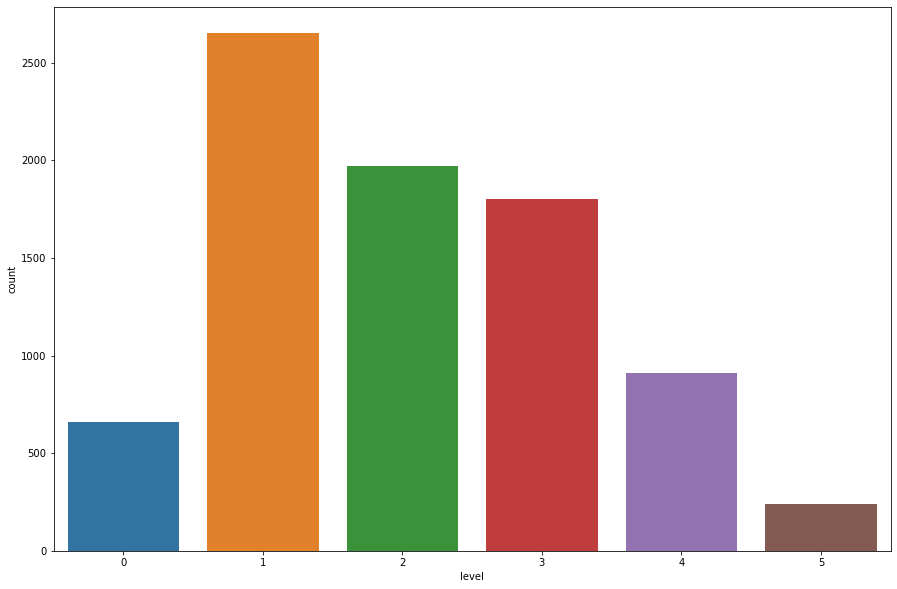

In [171]:
sns.countplot(damta['level'])

In [172]:
damta.to_csv('Data_Combine.csv', sep=',', index=False,header=True) 

In [202]:
data=pd.read_csv('Data_Combine.csv')

In [203]:
data

,TM,Tm,H,VV,V,Month,weekend,level
0,31,23,77,1,8,12,1,2
1,30,19,42,2,9,12,1,2
2,31,14,34,2,9,12,0,3
3,32,19,35,2,10,12,0,3
4,32,21,47,2,8,12,1,3
...,...,...,...,...,...,...,...,...
8225,25,9,41,4,10,12,0,2
8226,25,9,49,3,12,12,0,2
8227,28,11,48,3,9,12,1,3
8228,27,10,55,4,12,12,1,3


In [204]:
data=data.astype({"level":'category'})


In [205]:
data.describe()

,TM,Tm,H,VV,V,Month,weekend
count,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000,8230.000000
mean,31.701823,21.008505,64.977643,3.210328,8.389793,6.933657,0.281774
std,3.810339,5.020331,18.111615,1.292026,4.581442,3.607923,0.449891
min,8.000000,-1.000000,9.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,18.000000,51.000000,2.000000,5.000000,4.000000,0.000000
50%,32.000000,23.000000,68.000000,3.000000,8.000000,7.000000,0.000000
75%,34.000000,25.000000,80.000000,4.000000,11.000000,10.000000,1.000000
max,46.000000,33.000000,99.000000,9.000000,25.000000,12.000000,1.000000


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   TM       8230 non-null   int64   
 1   Tm       8230 non-null   int64   
 2   H        8230 non-null   int64   
 3   VV       8230 non-null   int64   
 4   V        8230 non-null   int64   
 5   Month    8230 non-null   int64   
 6   weekend  8230 non-null   int64   
 7   level    8230 non-null   category
dtypes: category(1), int64(7)
memory usage: 458.4 KB


In [207]:
#data=data.sample(frac=1)

In [208]:
data

,TM,Tm,H,VV,V,Month,weekend,level
0,31,23,77,1,8,12,1,2
1,30,19,42,2,9,12,1,2
2,31,14,34,2,9,12,0,3
3,32,19,35,2,10,12,0,3
4,32,21,47,2,8,12,1,3
...,...,...,...,...,...,...,...,...
8225,25,9,41,4,10,12,0,2
8226,25,9,49,3,12,12,0,2
8227,28,11,48,3,9,12,1,3
8228,27,10,55,4,12,12,1,3


In [209]:
season=[]
for i in range(len(data['Month'])):
    if data['Month'][i]>=3 and data['Month'][i]<=5:
        season.append('Spring')
    if data['Month'][i]>=6 and data['Month'][i]<=8:
        season.append('Summer')
    if data['Month'][i]>=9 and data['Month'][i]<=11:
        season.append('Autumn')
    if data['Month'][i]==12 or data['Month'][i]==1 or data['Month'][i]==2:
        season.append('Winter')
season

['Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Spring',
 'Summer',
 'Summer',
 'Summer',
 'Summer',
 'Summer',

In [210]:
data['Season']=season

In [211]:
data

,TM,Tm,H,VV,V,Month,weekend,level,Season
0,31,23,77,1,8,12,1,2,Winter
1,30,19,42,2,9,12,1,2,Winter
2,31,14,34,2,9,12,0,3,Winter
3,32,19,35,2,10,12,0,3,Winter
4,32,21,47,2,8,12,1,3,Winter
...,...,...,...,...,...,...,...,...,...
8225,25,9,41,4,10,12,0,2,Winter
8226,25,9,49,3,12,12,0,2,Winter
8227,28,11,48,3,9,12,1,3,Winter
8228,27,10,55,4,12,12,1,3,Winter


In [215]:
data1=data

In [217]:
dum_df = pd.get_dummies(data1, columns=["Season"], prefix=[""] )
dum_df
# # merge with main df bridge_df on key values
# bridge_df = bridge_df.join(dum_df)
# bridge_df


,TM,Tm,H,VV,V,Month,weekend,level,_Autumn,_Spring,_Summer,_Winter
0,31,23,77,1,8,12,1,2,0,0,0,1
1,30,19,42,2,9,12,1,2,0,0,0,1
2,31,14,34,2,9,12,0,3,0,0,0,1
3,32,19,35,2,10,12,0,3,0,0,0,1
4,32,21,47,2,8,12,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8225,25,9,41,4,10,12,0,2,0,0,0,1
8226,25,9,49,3,12,12,0,2,0,0,0,1
8227,28,11,48,3,9,12,1,3,0,0,0,1
8228,27,10,55,4,12,12,1,3,0,0,0,1


In [220]:
data=dum_df.drop(['Month','weekend'],axis=1)

In [221]:
data

,TM,Tm,H,VV,V,level,_Autumn,_Spring,_Summer,_Winter
0,31,23,77,1,8,2,0,0,0,1
1,30,19,42,2,9,2,0,0,0,1
2,31,14,34,2,9,3,0,0,0,1
3,32,19,35,2,10,3,0,0,0,1
4,32,21,47,2,8,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
8225,25,9,41,4,10,2,0,0,0,1
8226,25,9,49,3,12,2,0,0,0,1
8227,28,11,48,3,9,3,0,0,0,1
8228,27,10,55,4,12,3,0,0,0,1


In [222]:
Aqi_level=data['level']

In [226]:
data['aqi_level']=Aqi_level

In [227]:
data

,TM,Tm,H,VV,V,level,_Autumn,_Spring,_Summer,_Winter,aqi_level
0,31,23,77,1,8,2,0,0,0,1,2
1,30,19,42,2,9,2,0,0,0,1,2
2,31,14,34,2,9,3,0,0,0,1,3
3,32,19,35,2,10,3,0,0,0,1,3
4,32,21,47,2,8,3,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
8225,25,9,41,4,10,2,0,0,0,1,2
8226,25,9,49,3,12,2,0,0,0,1,2
8227,28,11,48,3,9,3,0,0,0,1,3
8228,27,10,55,4,12,3,0,0,0,1,3


In [228]:
data=data.drop(['level'],axis=1)

In [229]:
data

,TM,Tm,H,VV,V,_Autumn,_Spring,_Summer,_Winter,aqi_level
0,31,23,77,1,8,0,0,0,1,2
1,30,19,42,2,9,0,0,0,1,2
2,31,14,34,2,9,0,0,0,1,3
3,32,19,35,2,10,0,0,0,1,3
4,32,21,47,2,8,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...
8225,25,9,41,4,10,0,0,0,1,2
8226,25,9,49,3,12,0,0,0,1,2
8227,28,11,48,3,9,0,0,0,1,3
8228,27,10,55,4,12,0,0,0,1,3


In [1]:
data.to_csv('Final_Data.csv', sep=',', index=False,header=True) 

In [2]:
import pandas as pd

In [17]:
data=pd.read_csv('Final_Data.csv')

In [18]:
data

,TM,Tm,H,VV,V,_Autumn,_Spring,_Summer,_Winter,aqi_level
0,31,23,77,1,8,0,0,0,1,2
1,30,19,42,2,9,0,0,0,1,2
2,31,14,34,2,9,0,0,0,1,3
3,32,19,35,2,10,0,0,0,1,3
4,32,21,47,2,8,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...
8225,25,9,41,4,10,0,0,0,1,2
8226,25,9,49,3,12,0,0,0,1,2
8227,28,11,48,3,9,0,0,0,1,3
8228,27,10,55,4,12,0,0,0,1,3


In [19]:
# data = pd.get_dummies(data, columns=["aqi_level"], prefix=["level_"] )
# data
# # # merge with main df bridge_df on key values
# # bridge_df = bridge_df.join(dum_df)
# # bridge_df


In [20]:
#data=data.sample(frac=1)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [22]:
clf = LogisticRegression(random_state=5, multi_class='ovr')

In [23]:
X=data.iloc[:,:9]
y=data.iloc[:,9:]

In [24]:
X

,TM,Tm,H,VV,V,_Autumn,_Spring,_Summer,_Winter
0,31,23,77,1,8,0,0,0,1
1,30,19,42,2,9,0,0,0,1
2,31,14,34,2,9,0,0,0,1
3,32,19,35,2,10,0,0,0,1
4,32,21,47,2,8,0,0,0,1
...,...,...,...,...,...,...,...,...,...
8225,25,9,41,4,10,0,0,0,1
8226,25,9,49,3,12,0,0,0,1
8227,28,11,48,3,9,0,0,0,1
8228,27,10,55,4,12,0,0,0,1


In [25]:
y

,aqi_level
0,2
1,2
2,3
3,3
4,3
...,...
8225,2
8226,2
8227,3
8228,3


In [26]:
import numpy as np
y=np.array(y)

In [27]:
model = clf.fit(X, y)

C:\Users\VIPUL\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VIPUL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VIPUL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

In [28]:
new_observation = [[31,23,77,1,8,0,0,0,1]]

In [29]:
model.predict_proba(new_observation)

array([[0.03455314, 0.14587505, 0.28477174, 0.31528842, 0.19076154,
        0.02875011]])

In [30]:
pred=model.predict(X)

In [31]:
pred

array([3, 2, 3, ..., 3, 4, 4], dtype=int64)

In [32]:
y

array([[2],
       [2],
       [3],
       ...,
       [3],
       [3],
       [3]], dtype=int64)

In [38]:
c=0
for i in range(len(pred)):
    if pred[i]==y[i] or pred[i]==y[i]+1 or pred[i]==y[i]+2:
        c+=1
print(c/len(pred))

0.6278250303766707


In [39]:
c=0
for i in range(len(pred)):
    if pred[i]<y[i]-1:
        c+=1
print(c/len(pred))

0.1341433778857837


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
dtree_model = DecisionTreeClassifier(max_depth =20).fit(X, y)
pred = dtree_model.predict(X)
  
# creating a confusion matrix
cm = confusion_matrix(y,pred)

In [83]:
cm

array([[ 354,  215,   32,   50,    5,    1],
       [ 106, 2271,  112,  126,   35,    1],
       [  69,  430, 1255,  147,   60,    7],
       [  48,  312,  140, 1211,   89,    3],
       [  25,  116,   83,  192,  489,    4],
       [  11,   30,   21,   65,   42,   73]], dtype=int64)

In [84]:
c=0
for i in range(len(pred)):
    if pred[i]==y[i] or pred[i]==y[i]+1 or pred[i]==y[i]+2:
        c+=1
print(c/len(pred))

0.7826245443499392


In [85]:
c=0
for i in range(len(pred)):
    if pred[i]<y[i]-1:
        c+=1
print(c/len(pred))

0.09477521263669501


In [88]:
from sklearn.svm import SVC

svm_model_linear = SVC(kernel = 'linear', C = 6).fit(X, y)
svm_predictions = svm_model_linear.predict(X)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X, y)

# creating a confusion matrix
cm = confusion_matrix(y, svm_predictions)

C:\Users\VIPUL\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [89]:
accuracy

0.4247873633049818

In [91]:
c=0
for i in range(len(pred)):
    if svm_predictions[i]==y[i] or svm_predictions[i]==y[i]+1 or svm_predictions[i]==y[i]+2:
        c+=1
print(c/len(pred))

0.6331713244228433


In [92]:
c=0
for i in range(len(pred)):
    if svm_predictions[i]<y[i]-1:
        c+=1
print(c/len(pred))

0.13195625759416768


In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6).fit(X, y)
  
# accuracy on X_test
accuracy = knn.score(X, y)
print(accuracy)

# creating a confusion matrix
knn_predictions = knn.predict(X) 
cm = confusion_matrix(y, knn_predictions)

<ipython-input-93-6ae9cf17c9de>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier(n_neighbors = 6).fit(X, y)


0.5394896719319563


In [94]:
knn_predictions

array([2, 2, 3, ..., 3, 3, 4], dtype=int64)

In [96]:
c=0
for i in range(len(pred)):
    if knn_predictions[i]==y[i] or knn_predictions[i]==y[i]+1 or knn_predictions[i]==y[i]+2:
        c+=1
print(c/len(pred))

0.6948967193195625


In [99]:
c=0
for i in range(len(pred)):
    if knn_predictions[i]<y[i]-1:
        c+=1
print(c/len(pred))

0.11859052247873633


In [102]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X, y)
pred = gnb.predict(X)
  
# accuracy on X_test
accuracy = gnb.score(X, y)
print(accuracy)
  
# creating a confusion matrix

0.3551640340218712


C:\Users\VIPUL\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [103]:
c=0
for i in range(len(pred)):
    if pred[i]==y[i] or pred[i]==y[i]+1 or pred[i]==y[i]+2:
        c+=1
print(c/len(pred))

0.6278250303766707


In [104]:
c=0
for i in range(len(pred)):
    if pred[i]<y[i]-1:
        c+=1
print(c/len(pred))

0.1301336573511543


In [33]:
data['aqi_level'].unique()

array([0, 3, 2, 1, 4, 5], dtype=int64)

In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [123]:
classifier = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 42)
classifier.fit(X, y)

<ipython-input-123-c8d64efac825>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X, y)


RandomForestClassifier(criterion='entropy', n_estimators=12, random_state=42)

In [124]:
pred = classifier.predict(X)


In [125]:
c=0
for i in range(len(pred)):
    if pred[i]==y[i] or pred[i]==y[i]+1 or pred[i]==y[i]+2:
        c+=1
print(c/len(pred))

0.8307411907654921


In [126]:
c=0
for i in range(len(pred)):
    if pred[i]<y[i]-1:
        c+=1
print(c/len(pred))

0.06658566221142163


In [129]:
import seaborn as sns

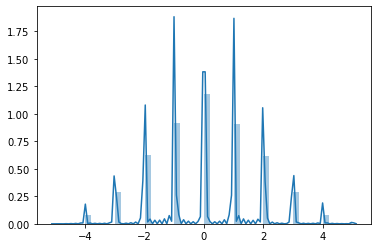

In [130]:
sns.distplot(y-pred)